# House Price Prediction

# Problem statement:

A house value is simply more than location and square footage. Like the features that make
up a person, an educated party would want to know all aspects that give a house its value. For
example, you want to sell a house and you don’t know the price which you can take — it can’t
be too low or too high. To find house price you usually try to find similar properties in your
neighbourhood and based on gathered data you will try to assess your house price.

# Attributes information:

Take advantage of all of the feature variables available below, use it to analyse and predict
house prices.
1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might
or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 23: total_area: Measure of both living and lot

# Objective

1. To undertake a multi-faceted project that demonstrates our understanding and mastery of
the key conceptual and technological aspects of Machine Learning
2. To develop a visceral understanding of how analytics problems are solved using a
combination of tools and techniques.
3. To understand the trade-offs that need to be made when solving a problem in real life.
4. To reinforce the analytical problem solving methodology.

# 1. Problem Definition

If anybody wants to buy or sell house(or any property) in any city the main problem they face is to fix the right price for that particular house. Due to this they might be offering too low or high for the property.There are 'n' number of attributes which can influence the price for the house. 
The main intent of this project/work is to determine the right price of a house by considering the various attributes given in the dataset.

# 2. Importing Dataset

In [1]:
# Data wrangling libraries
import pandas as pd
import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [2]:
# Loading the dataset
hdf = pd.read_csv('innercity.csv')             # hdf --> Innercity dataframe or housing dataframe

In [3]:
# printing first five values of the dataset
hdf.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


# 3. Analysing the dataset & Data cleaning

In [4]:
# Exploring the shape of the dataset
hdf.shape
print(f'''The house dataset has {hdf.shape[0]} records and {hdf.shape[1]} attributes.''')

The house dataset has 21613 records and 23 attributes.


In [5]:
# Detailed information about columns
hdf.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

Insight about the different attributes -->
* cid: Id for the particular house.
* dayhours: Represents Date, when house was sold.
* price: That needs to be determined...TARGET feature(Dependent attribute)
* room_bed: Represents number of bedrooms in a house
* room_bath: Represents number of bathrooms in a house
* living_measure: Represents square footage of house
* lot_measure: Represents square footage of lot
* ceil: Represents number of floors in house
* coast: Represents whether house has waterfront view.(Binary) 
* sight: Represents how many times sight has been viewed.
* condition: Represents the overall condition of the house. It's kind of rating given to the house.
* quality: Represents grade given to the house based on grading system
* ceil_measure: Represents square footage of house apart from basement
* basement: Represents square footage of basement
* yr_built: Represents the year when house was built
* yr_renovated: Represents the year when house was last renovated
* zipcode: Represents zipcode as name implies
* lat: Represents Lattitude co-ordniates
* long: Represents Longitude co-ordinates
* living_measure15: Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened
* lot_measure15: Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done
* furnished: Tells whether house is furnished or not. It seems to be categorical variable as description implies
* total_area: Represents total area i.e. area of both living and lot

In [6]:
# getting info about data types of each attributes.
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [7]:
# Function to check null values, data types and number of unique values in each column.
def get_inform(hdf):
    check_df = pd.DataFrame()
    check_df['Null_values'] = hdf.isnull().sum()
    check_df['data_types'] = hdf.dtypes
    check_df['unique'] = hdf.nunique()
    check_df['duplicated'] = hdf.duplicated()
    
    return check_df
get_inform(hdf)

,Null_values,data_types,unique,duplicated
cid,0,int64,21436,NaN
dayhours,0,object,372,NaN
price,0,int64,3625,NaN
room_bed,0,int64,13,NaN
room_bath,0,float64,30,NaN
living_measure,0,int64,1038,NaN
lot_measure,0,int64,9782,NaN
ceil,0,float64,6,NaN
coast,0,int64,2,NaN
sight,0,int64,5,NaN


In [8]:
# let's check how many missing values are there in each attributes.
hdf.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

Found there are no missing value in the dataset.

In [9]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
hdf.duplicated().sum()

0

# 4. Data analysis & visualisation


In [10]:
# let's do initial statistical analysis for the entire dataset
hdf.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00



    CID: House ID/Property ID.Not used for analysis
    Dayhours: 5 factor analysis is reflecting for this column
    price: Our taget column value is in 75k - 7700k range. As Mean > Median, it's Right-Skewed.
    room_bed: Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's slightly Right-Skewed.
    room_bath: Number of bathrooms range from 0 - 8. As Mean slightly < Median, it's slightly Left-Skewed.
    living_measure: Square footage of house range from 290 - 13,540. As Mean > Median, it's Right-Skewed.
    lot_measure: Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's Hightly Right-Skewed.
    ceil: Number of floors range from 1 - 3.5 As Mean ~ Median, it's almost Normal Distributed.
    coast: As this value represent whether house has waterfront view or not. It's categorical column. From above analysis we got know, very few houses has waterfront view.
    sight: Value ranges from 0 - 4. As Mean > Median, it's Right-Skewed
    condition: Represents rating of house which ranges from 1 - 5. As Mean > Median, it's Right-Skewed
    quality: Representign grade given to house which range from 1 - 13. As Mean > Median, it's Right-Skewed.
    ceil_measure: Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's Right-Skewed.
    basement: Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's Highly Right-Skewed.
    yr_built: House built year ranges from 1900 - 2015. As Mean < Median, it's Left-Skewed.
    yr_renovated: House renovation year only 2015. So this column can be used as Categorical Variable for knowing whether house is renovated or not.
    zipcode: House ZipCode ranges from 98001 - 98199. As Mean > Median, it's Right-Skewed.
    lat: Lattitude ranges from 47.1559 - 47.7776 As Mean < Median, it's Left-Skewed.
    long: Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's Right-Skewed.
    living_measure15: Value ragnes from 399 to 6,210. As Mean > Median, it's Right-Skewed.
    lot_measure15: Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's Highly Right-Skewed.
    furnished: Representing whether house is furnished or not. It's a Categorical Variable
    total_area Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's Highly Right-Skewed

From above analysis we got to know,

Most columns distribution is Right-Skewed and only few features are Left-Skewed (like room_bath, yr_built, lat).

We have columns which are Categorical in nature are -> coast, yr_renovated, furnished


Will create new feature (column) i.e. 'Houseage' from 'dayhours' and 'yr_built'

In [11]:
# Extract only year of sale from dayhours
year = []

for i in hdf['dayhours']:
    y = int(str(i)[:4])
    year.append(y)
hdf['sold_year']= year
hdf.head(2)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014


New column is created by extracting only year from the 'dayhours'

In [12]:
# Calculate age of property based on built year and sale year
hdf["house_age"] = hdf['sold_year']-hdf['yr_built']
hdf.head(2)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38


New attribute 'house_age is created by considering 'soldyear' & 'yr_built' 

# Univariate analysis

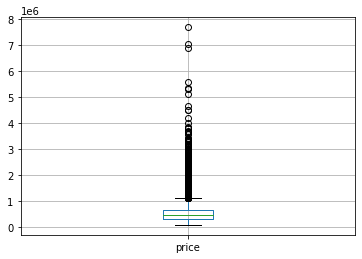

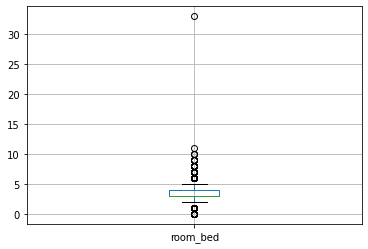

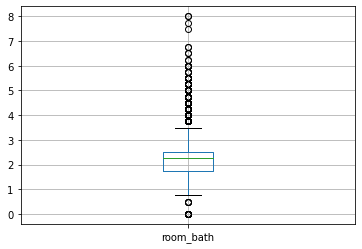

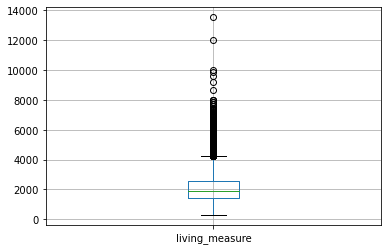

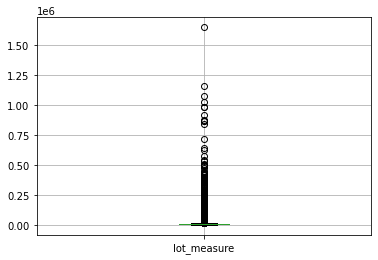

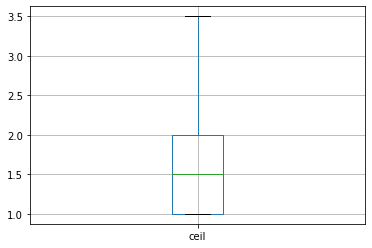

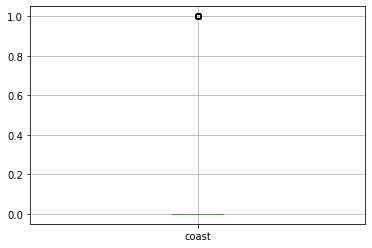

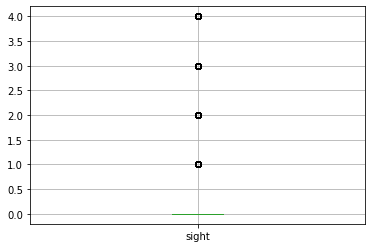

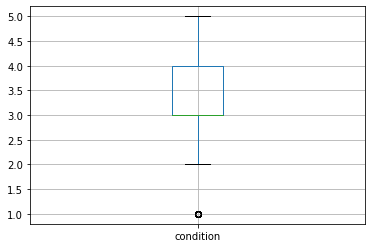

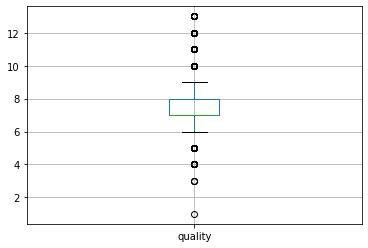

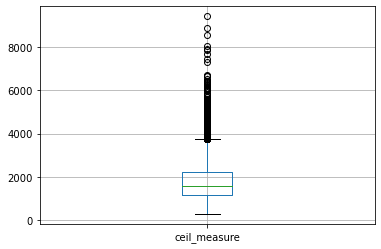

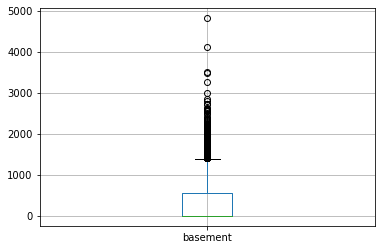

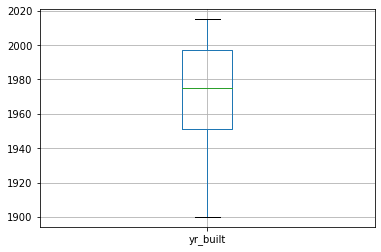

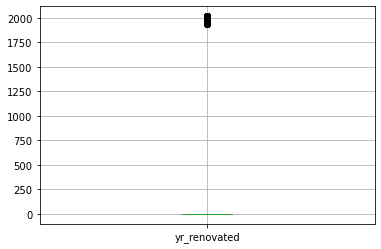

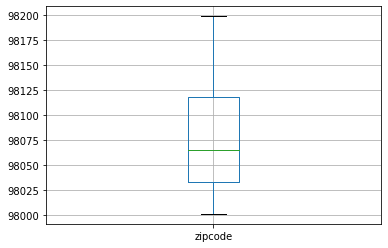

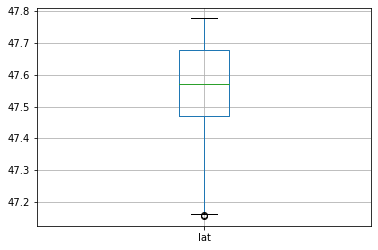

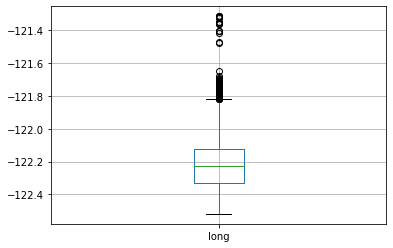

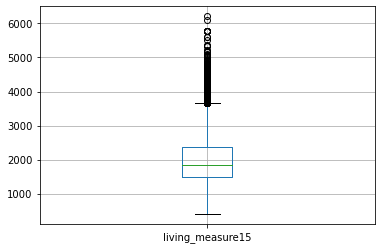

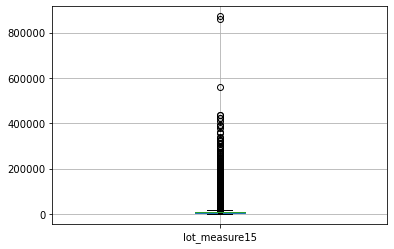

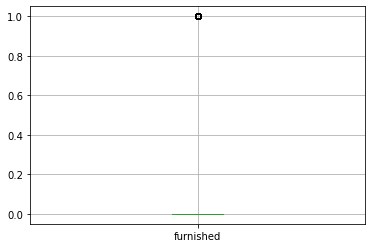

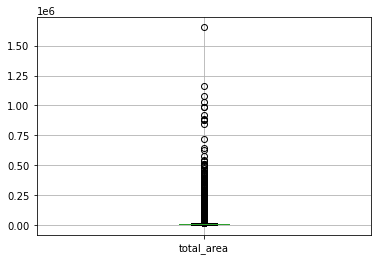

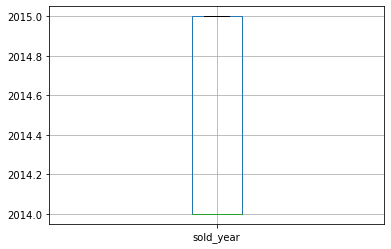

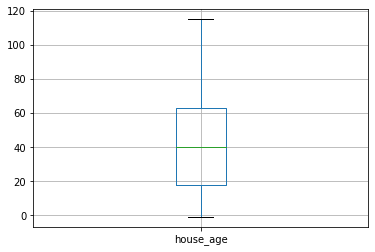

In [13]:
for i in hdf.iloc[:, 2:].columns:
    hdf.boxplot(column=i)
    plt.show()

# Analysing all the attributes one by one

# cid

In [14]:
cid_count = hdf['cid'].value_counts()
cid_count[cid_count>1].shape         #--> checking how many times cid count is repeated more than once

(176,)

It was found that the same cid_count is repeated more than once 1 for 176 times. That means 176 properties that were sold more than once.

# dayhours

In [15]:
# chnaging 'dayhours' to 'month year'
hdfr = hdf.copy()
hdf.dayhours = hdf.dayhours.str.replace('T000000',"")
hdf.dayhours = pd.to_datetime(hdf.dayhours)
hdf.dayhours = hdf.dayhours.apply(lambda x: x.strftime('%m-%Y'))

In [16]:
hdf.rename(columns={'dayhours':'month_year'}, inplace=True)
hdf.head(2)

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
0,3034200666,11-2014,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,12-2014,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38


In [17]:
hdf['month_year'].value_counts()

04-2015    2231
07-2014    2211
06-2014    2180
08-2014    1940
10-2014    1878
03-2015    1875
09-2014    1774
05-2014    1768
12-2014    1471
11-2014    1411
02-2015    1250
01-2015     978
05-2015     646
Name: month_year, dtype: int64

We can see, most houses sold in April, July and in the  month of June

In [18]:
hdf.groupby(['month_year'])['price'].agg('mean')

month_year
01-2015    525963.251534
02-2015    507919.603200
03-2015    544057.683200
04-2015    561933.463021
05-2014    548166.600113
05-2015    558193.095975
06-2014    558123.736239
07-2014    544892.161013
08-2014    536527.039691
09-2014    529315.868095
10-2014    539127.477636
11-2014    522058.861800
12-2014    524602.893270
Name: price, dtype: float64

So the time line of the sale data of the properties is from May-2014 to May-2015 and April month have the highest mean price.

# Price

In [19]:
hdf.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

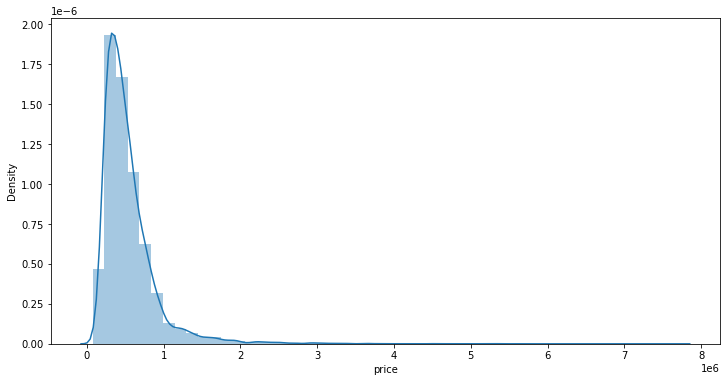

In [20]:
#will check for the dstribution of the price variable
plt.figure(figsize=(12,6))
sns.distplot(hdf.price);

price of the house is not symmetrical it is rightly skewed with outliers.Price range for most of the house is under 2000000.

# room_bed

In [21]:
hdf['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

There seems to be one outlier with a value of 33 bedrooms. Will check with the same.

In [22]:
hdf[hdf['room_bed'] ==33]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
750,2402100895,06-2014,640000,33,1.75,1620,6000,1.0,0,0,...,0,98103,47.6878,-122.331,1330,4700,0,7620,2014,67


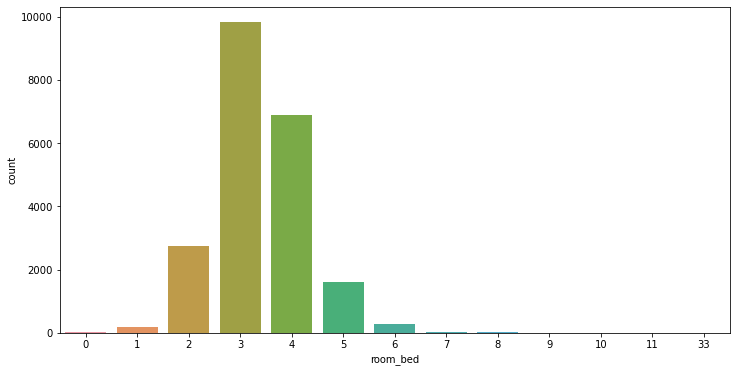

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(hdf.room_bed);

Majority of the house has 3 bedrooms followed by 4 bedrooms, 2 bedrooms,5 bedrooms,6 bedrooms,1 bedroom,7,8 and 0 bedrooms. The 33 bedroom what we got in the above analysis is defnitely an outlier it needs to be deleted.

# room_bath

In [24]:
hdf.room_bath.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: room_bath, dtype: float64

Number of bathrooms varies from 0 to 8. 

In [25]:
hdf['room_bath'].value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

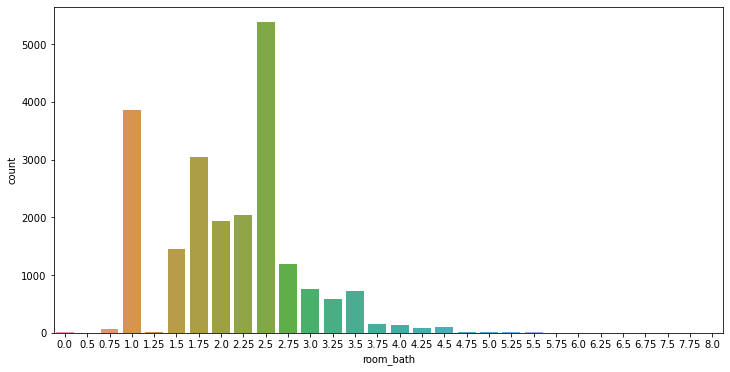

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(hdf.room_bath);

2.5 number of bathrooms found in majority of the houses followed by 1 bathrrom.

# Living measure (square footage of the home)

Skewness is : 1.471555426802092


count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

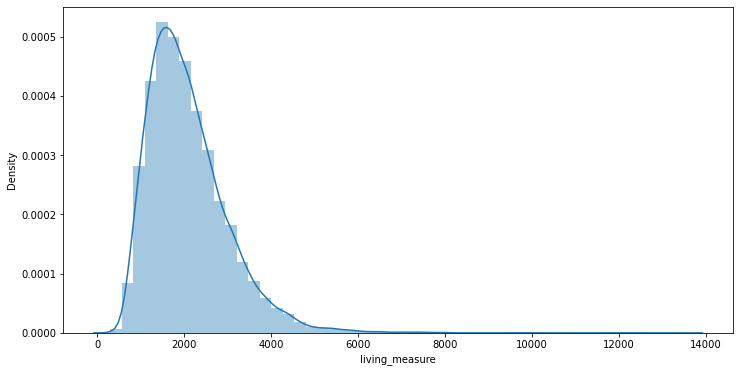

In [27]:
plt.figure(figsize=(12,6))
print("Skewness is :",hdf.living_measure.skew())
sns.distplot(hdf.living_measure);
hdf.living_measure.describe()

Living measure is the square footage of the house. Living measure varied from 290 sq.ft to 13540 sq.ft. There is no much deviation of mode from mean. Almost normal distrribution with slightly right skewed. Skew factor is 1.47. From the above graph it is observed that majority of the house's living measure is 2000 sq.ft.

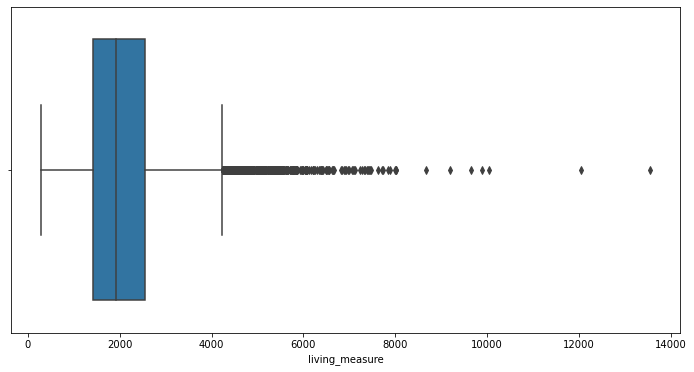

In [28]:
#Let's plot the boxplot for living_measure
plt.figure(figsize=(12,6))
sns.boxplot(hdf.living_measure);

Many outliers are observed.It needs to be taken care in the future analysis.

# lot_measure (square footage of the lot)

Skewness is : 13.06001895903175


count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

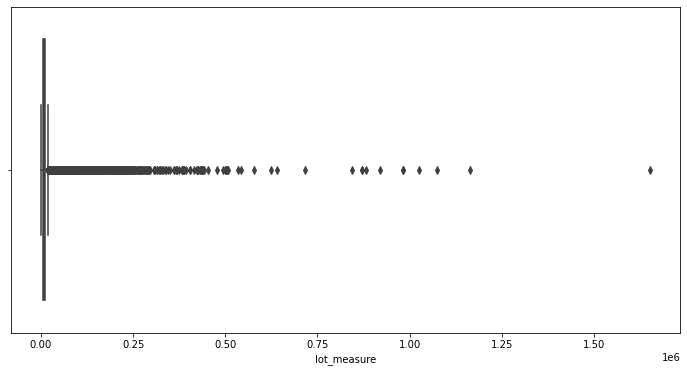

In [29]:
plt.figure(figsize=(12,6))
print("Skewness is :",hdf.lot_measure.skew())
sns.boxplot(hdf.lot_measure)
hdf.lot_measure.describe()

Lot measure varies from 520 to 16.5 Lakh square feet. Distribution is highly skewed with outliers. 

# ceil (Total floors  in house)

In [30]:
hdf.ceil.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64

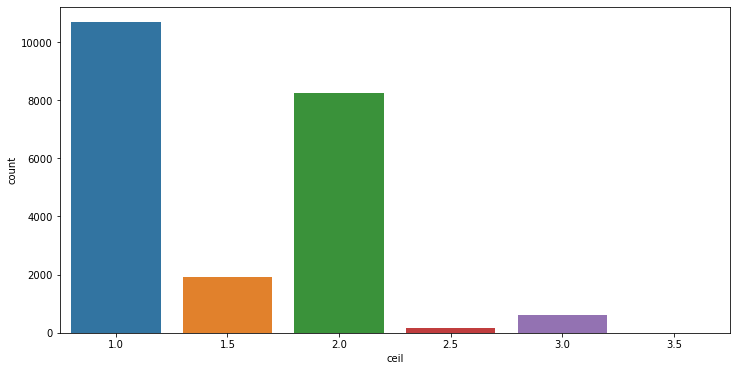

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(hdf.ceil);

Most of the house has 1 floor followed by 2 floors,1.5 and 3 floors.

# coast (House which has a view to a waterfront)

In [32]:
hdf.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

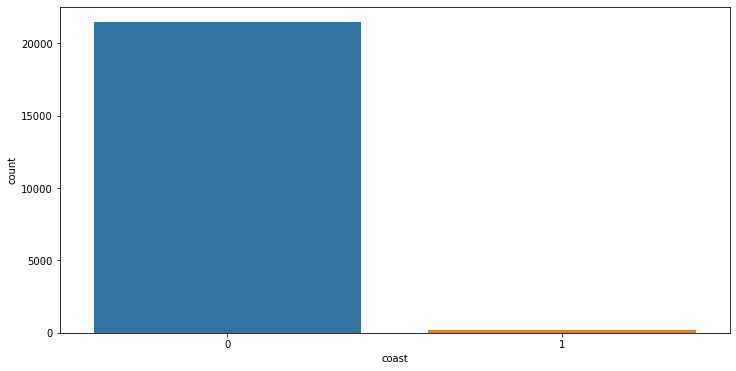

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(hdf.coast);

Coast is found binary type of data. House which have waterfront view represents 1 and house without waterfront view represents 0. Only 163 houses has waterfront view.

# Sight (represents how many times sight has been viewed.)

In [34]:
hdf.sight.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

Range of the sight varies from 0 to 4. Most of the house have not been viewed. And the respective values of how many times its been viewed is as shown.

# Condition (Overall condition of the house)

In [35]:
hdf.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Overall condition of the house is represented in the scale of 1 to 5. Majority of the house falls in the category of 3.

# quality (grade given to the housing unit, based on grading system)

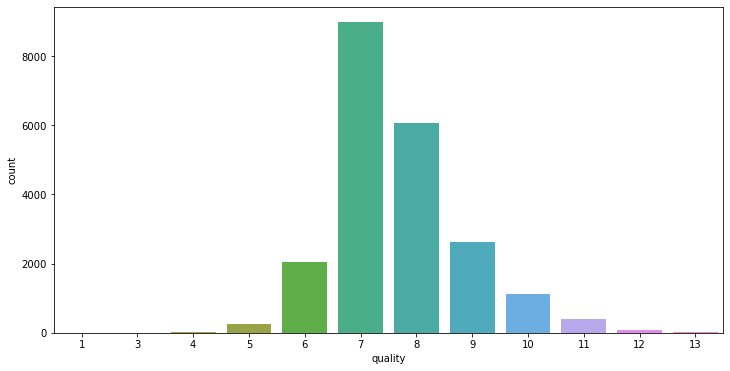

In [36]:
hdf.quality.value_counts()
plt.figure(figsize=(12,6))
sns.countplot(hdf.quality);

Quality - most properties have quality rating between 6 to 10

In [37]:
#checking the no. of data points with quality rating as 13
hdf[hdf['quality']==13]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
264,9208900037,09-2014,6890000,6,7.75,9890,31374,2.0,0,4,...,0,98039,47.6305,-122.240,4540,42730,1,41264,2014,13
1123,2303900035,06-2014,2890000,5,6.25,8670,64033,2.0,0,4,...,2003,98177,47.7295,-122.372,4140,81021,1,72703,2014,49
1583,2426039123,01-2015,2420000,5,4.75,7880,24250,2.0,0,2,...,0,98177,47.7334,-122.362,2740,10761,1,32130,2015,19
7095,2303900100,09-2014,3800000,3,4.25,5510,35000,2.0,0,4,...,0,98177,47.7296,-122.370,3430,45302,1,40510,2014,17
8509,4139900180,04-2015,2340000,4,2.50,4500,35200,1.0,0,0,...,0,98006,47.5477,-122.126,4760,35200,1,39700,2015,27
9446,1068000375,09-2014,3200000,6,5.00,7100,18200,2.5,0,0,...,2002,98199,47.6427,-122.408,3130,6477,1,25300,2014,81
10387,7237501190,10-2014,1780000,4,3.25,4890,13402,2.0,0,0,...,0,98059,47.5303,-122.131,5790,13539,1,18292,2014,10
12320,1725059316,11-2014,2390000,4,4.00,6330,13296,2.0,0,2,...,0,98033,47.6488,-122.201,2200,9196,1,19626,2014,14
12686,853200010,07-2014,3800000,5,5.50,7050,42840,1.0,0,2,...,0,98004,47.6229,-122.220,5070,20570,1,49890,2014,36
16785,6762700020,10-2014,7700000,6,8.00,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,1,39650,2014,104


There are only 13 propeties which have the highest quality rating

# Ceil_measure (square footage of house apart from basement)

Skewness is : 1.4466644733818372


count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

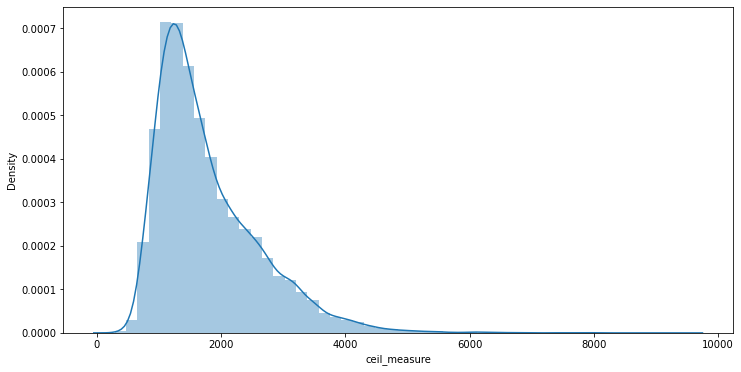

In [38]:
print("Skewness is :", hdf.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(hdf.ceil_measure)
hdf.ceil_measure.describe()

It is skewed towards right. Skewfactor is 1.44. Values ranges from 290 to 9410. Mean value is 1788 squarefeet.

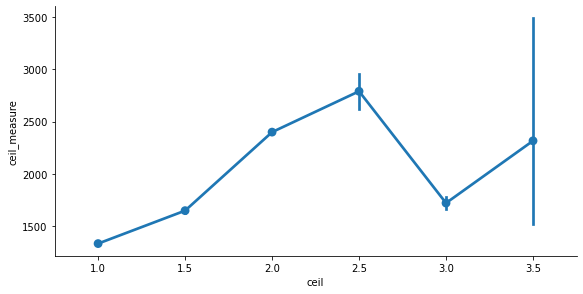

In [39]:
sns.factorplot(x='ceil',y='ceil_measure',data=hdf,size=4,aspect=2);

Found there are no direct or linear relation between ceil and ceil_measure

# Basement_measure (square footage of the basement)

Skewness is : 1.5779650555996247


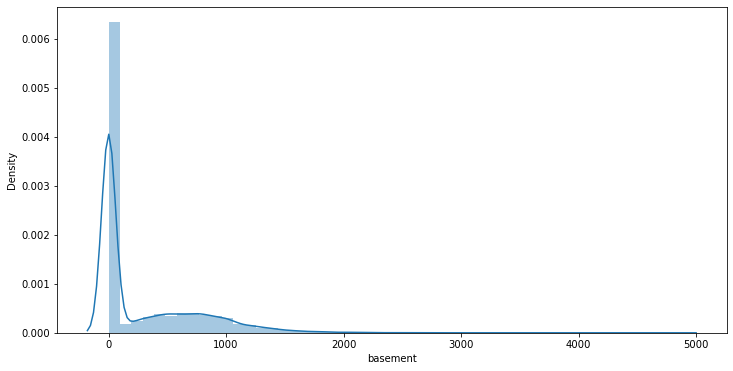

In [40]:
print("Skewness is :", hdf.basement.skew())
plt.figure(figsize=(12,6))
sns.distplot(hdf.basement);

2 distribution can be seen. That means there are some properties without basement and some are with basement.

In [41]:
hdf[hdf.basement==0].shape

(13126, 25)

In [42]:
hdf.basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

More than 50% of the property doesn't have basement

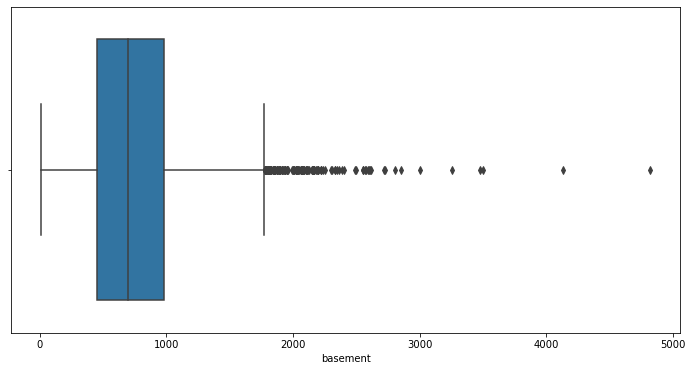

In [43]:
#let's plot boxplot for properties which have basements only
hdf_base=hdf[hdf['basement']>0]
plt.figure(figsize=(12,6));
sns.boxplot(hdf_base['basement']);

Boxplot for property which has basement only. We can see that there are many outliers that needs to adressed.

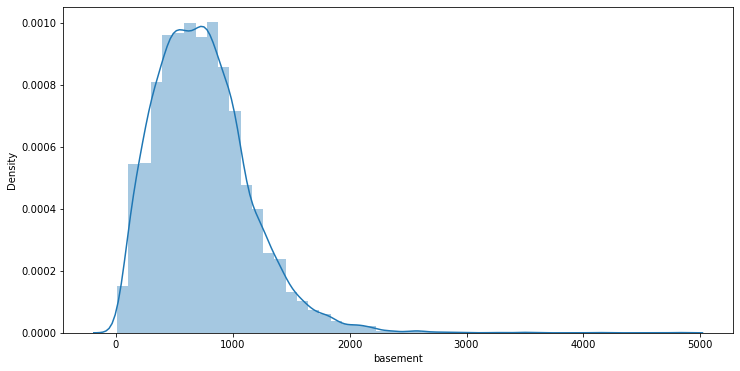

In [44]:
#Distribution of houses having basement
plt.figure(figsize=(12,6))
sns.distplot(hdf_base.basement);

Distribution having basement is right-skewed

# yr_built (Built Year)

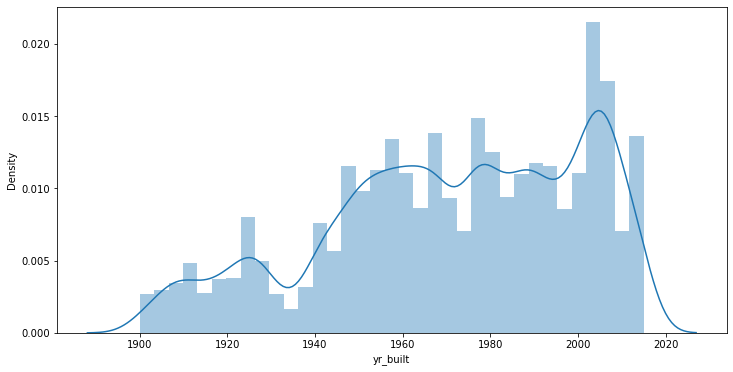

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(hdf.yr_built);

In [46]:
hdf.yr_built.value_counts(ascending=False)

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

variation of yr_built can be observed from 1900 to 2014, With more properties built in the year 2014

# yr_renovated (Year when house was renovated)

In [47]:
hdf.yr_renovated.describe()

count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [48]:
hdf[hdf.yr_renovated>0].shape

(914, 25)

914 houses were renovated out of 21613 houses

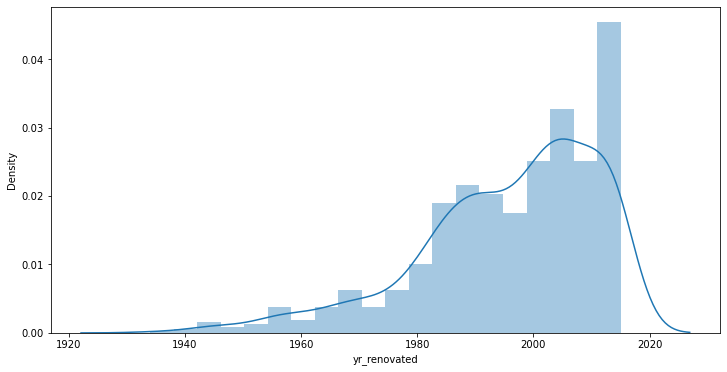

In [49]:
hdf_renovated = hdf[hdf.yr_renovated>0]
plt.figure(figsize=(12,6))
sns.distplot(hdf_renovated.yr_renovated);

# Furnished (Based on the quality of room)

0    17362
1     4251
Name: furnished, dtype: int64

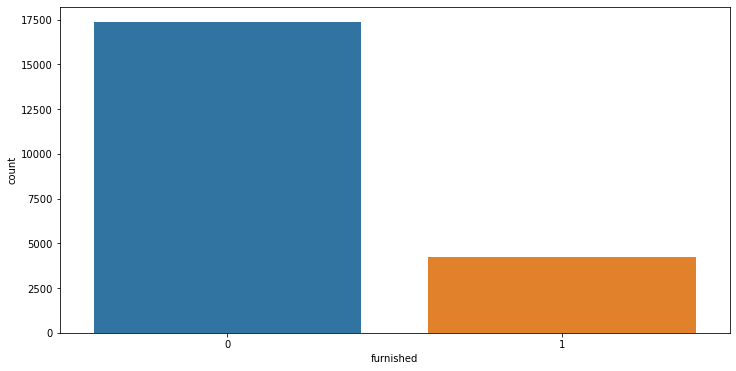

In [50]:
fig=plt.figure(figsize=(12,6))
sns.countplot(hdf.furnished)
hdf.furnished.value_counts()

0 ---> Not furnished
1 ---> Furnished

# Bi-Variate Analysis

# PairPlot

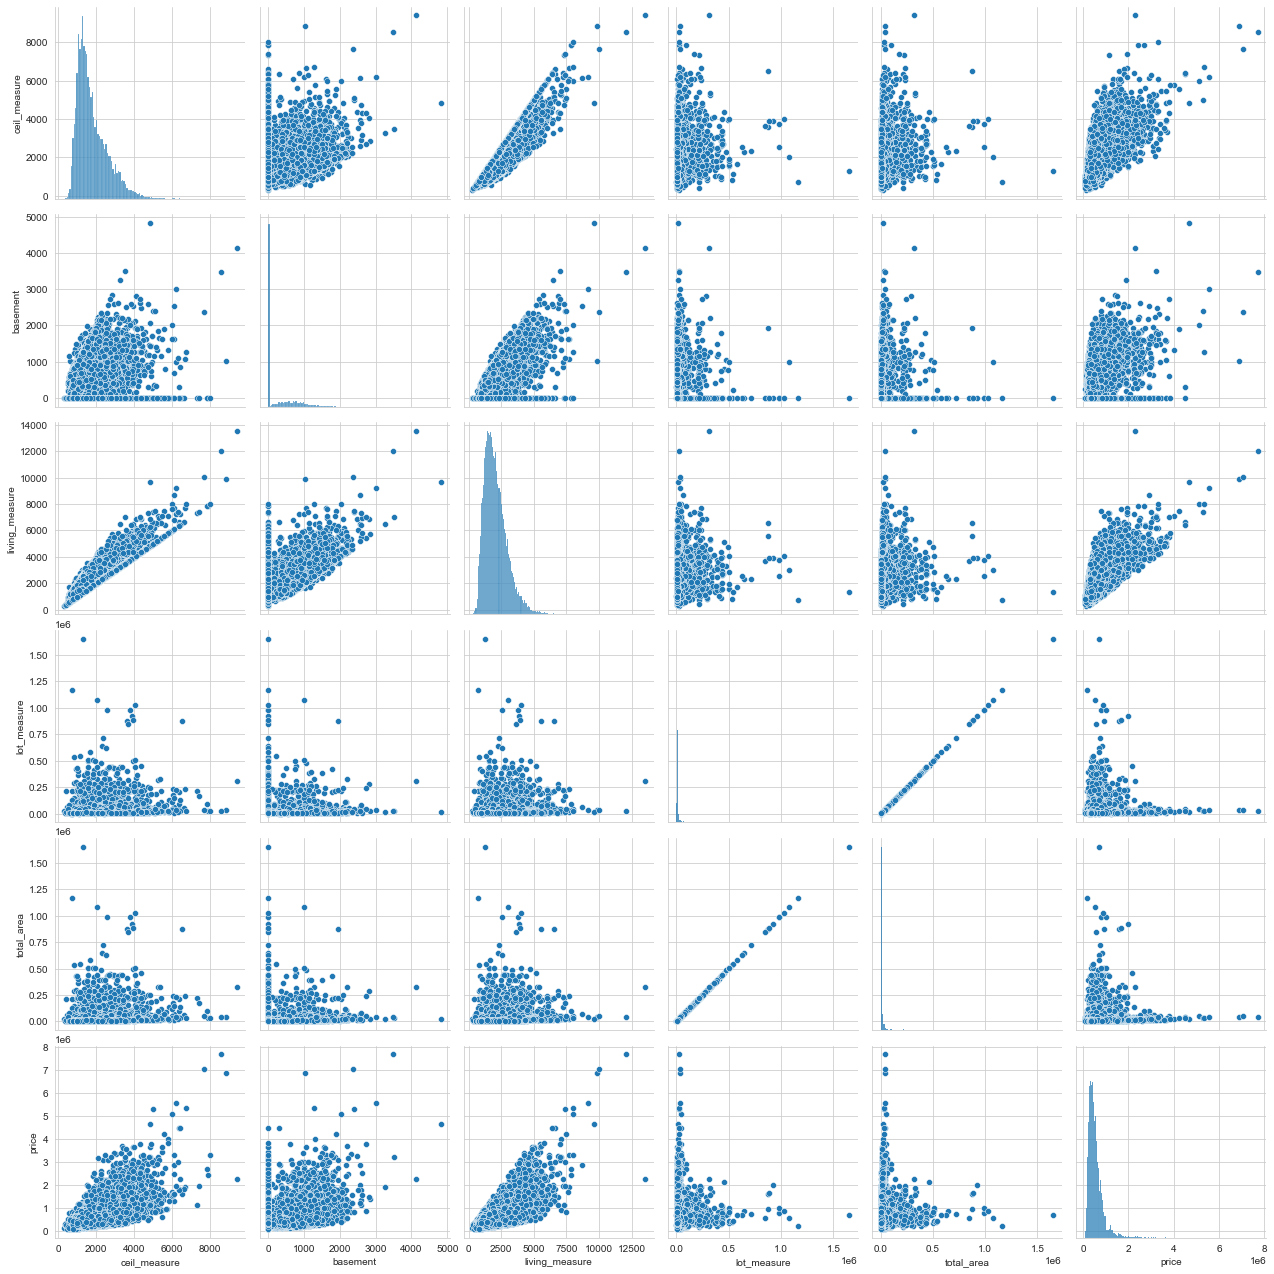

In [51]:
#Pairplot for data visualization 
plt.close();
sns.set_style('whitegrid');
sns.pairplot(hdf,vars = ['ceil_measure','basement','living_measure','lot_measure','total_area','price'],size=3);
plt.show()

In [52]:
hdf.head(2)

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
0,3034200666,11-2014,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,12-2014,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38


In [53]:
# let's see corelatoin between the different features
hdf_corr = hdf.corr(method ='pearson')
hdf_corr

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age
cid,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.010009,-0.131844,0.010128,-0.021217
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,...,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.565991,0.104796,0.003554,-0.053921
room_bed,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.259268,0.044310,-0.009838,-0.154324
room_bath,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.484923,0.104050,-0.026596,-0.506407
living_measure,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.632947,0.194209,-0.029038,-0.318488
lot_measure,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.118883,0.999763,0.005468,-0.052990
ceil,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.347749,0.002637,-0.022315,-0.489640
coast,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.069882,0.023809,-0.004165,0.026093
sight,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220250,0.080693,0.001364,0.053458
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.121902,-0.010219,-0.045589,0.360665


In [54]:
# let's check correlation of different features with target variable 
hdf.corr()['price']

cid                -0.016797
price               1.000000
room_bed            0.308338
room_bath           0.525134
living_measure      0.702044
lot_measure         0.089655
ceil                0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil_measure        0.605566
basement            0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
sold_year           0.003554
house_age          -0.053921
Name: price, dtype: float64

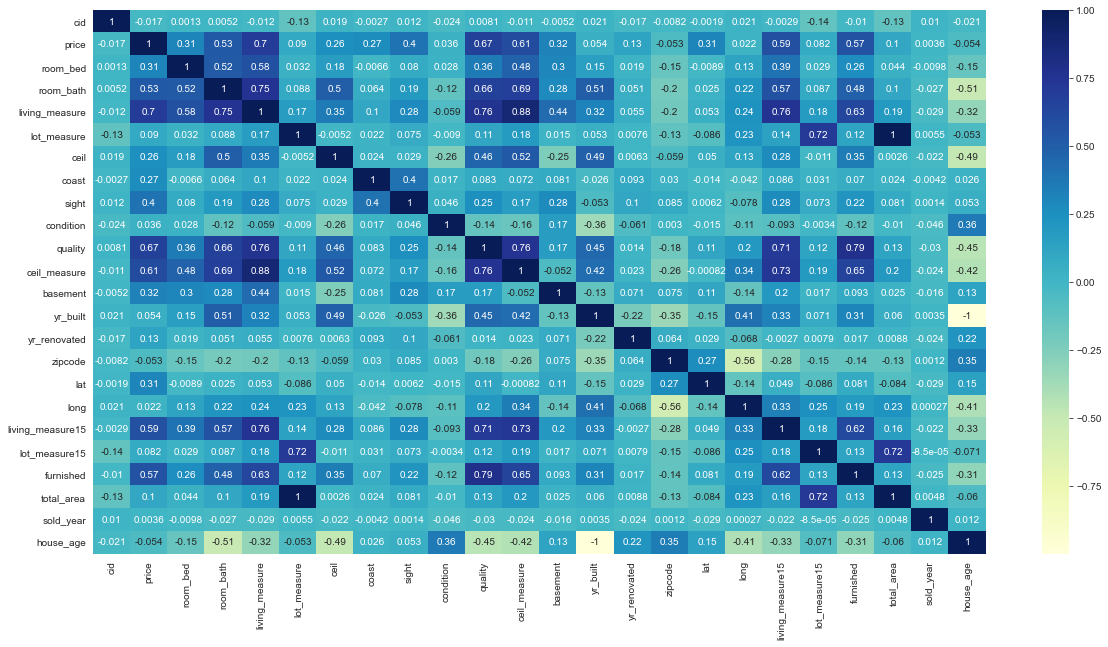

In [55]:
# Plotting heatmap
plt.subplots(figsize =(20, 10)) 
sns.heatmap(hdf_corr,cmap="YlGnBu",annot=True);

# room_bed v/s price

,mean,median,size
room_bed,,,
0,4.102231e+05,288000.0,13
1,3.176580e+05,299000.0,199
2,4.013877e+05,374000.0,2760
3,4.662766e+05,413000.0,9824
4,6.355647e+05,549997.5,6882
5,7.868741e+05,620000.0,1601
6,8.258535e+05,650000.0,272
7,9.514478e+05,728580.0,38
8,1.105077e+06,700000.0,13


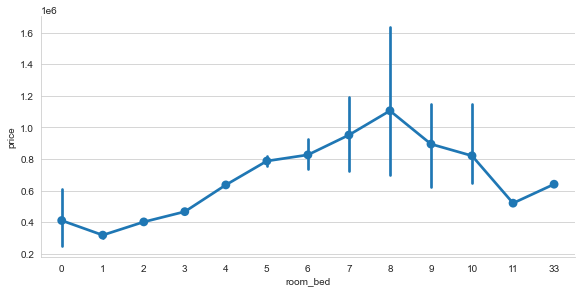

In [56]:
#Room_bed - outliers can be seen easily. Mean and median of price increases with number bedrooms/house uptill a point
#and then drops
sns.factorplot(x='room_bed',y='price',data=hdf, size=4, aspect=2);

#groupby
hdf.groupby('room_bed')['price'].agg(['mean','median','size'])

With increasing in room bed 'Price' is increasing. After 8 room_bed the graph is following decresing trend.

# room_bath v/s price

,mean,median,size
room_bath,,,
0.00,4.490950e+05,317500,10
0.50,2.373750e+05,264000,4
0.75,2.945209e+05,273500,72
1.00,3.470412e+05,320000,3852
1.25,6.217722e+05,516500,9
1.50,4.093457e+05,370000,1446
1.75,4.549158e+05,422900,3048
2.00,4.579050e+05,423250,1930
2.25,5.337688e+05,472500,2047


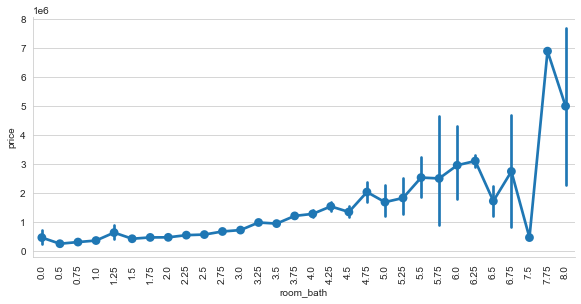

In [57]:
#room_bath - outliers can be seen easily. Overall mean and median price increares with increasing room_bath
sns.factorplot(x='room_bath',y='price',data=hdf,size=4, aspect=2);
plt.xticks(rotation=90)
#groupby
hdf.groupby('room_bath')['price'].agg(['mean','median','size'])

Price is following upward trend with respect to room_bath

# living_measure v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

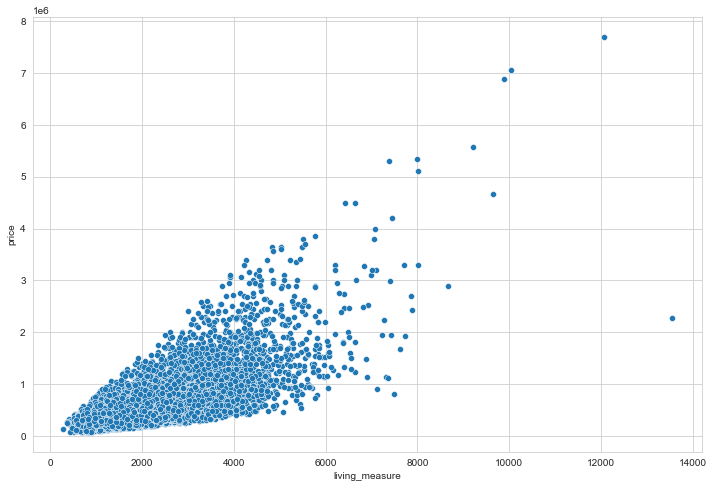

In [58]:
#living_measure - price increases with increase in living measure
plt.figure(figsize=(12, 8))
print(sns.scatterplot(hdf['living_measure'],hdf['price']));
hdf['living_measure'].describe()

There is a clear linear relationship can be observed with respect to price and living_measure. Also few outliers can be visible.

# lot_measure v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

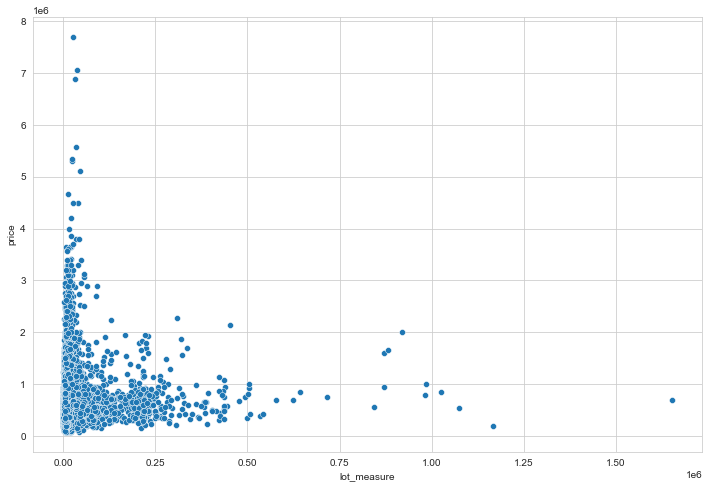

In [59]:
plt.figure(figsize=(12, 8))
print(sns.scatterplot(hdf['lot_measure'],hdf['price']));
hdf['lot_measure'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


count    19713.000000
mean      7762.510577
std       4252.549162
min        520.000000
25%       4997.000000
50%       7253.000000
75%       9620.000000
max      24969.000000
Name: lot_measure, dtype: float64

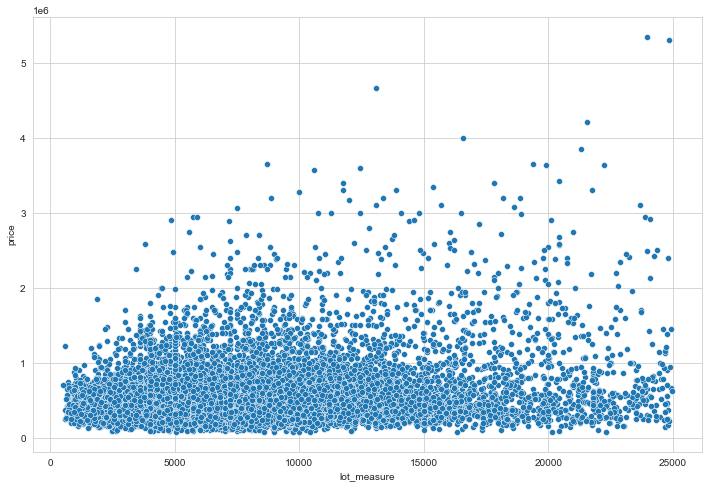

In [60]:
#lot_measure <25000
plt.figure(figsize=(12, 8))
x=hdf[hdf['lot_measure']<25000]
print(sns.scatterplot(x['lot_measure'],x['price']));
x['lot_measure'].describe()

No clear trend is observed between price and lot_measure. Also the corelation between price and lot_measure is  0.082456. We could drop this feature.

# ceil v/s Price

,mean,median,size
ceil,,,
1.0,4.422196e+05,390000,10680
1.5,5.590449e+05,524475,1910
2.0,6.490515e+05,542950,8241
2.5,1.061021e+06,799200,161
3.0,5.826201e+05,490000,613
3.5,9.339375e+05,534500,8


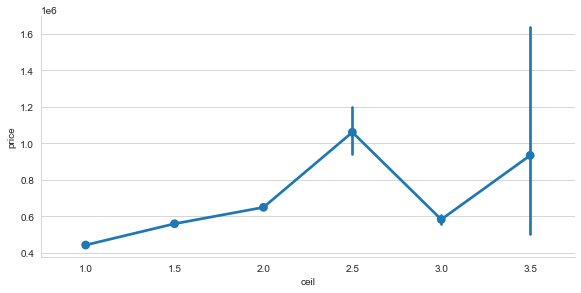

In [61]:
print(sns.factorplot(x='ceil',y='price',data=hdf, size = 4, aspect = 2))
#groupby
hdf.groupby('ceil')['price'].agg(['mean','median','size'])

ceil - median price increases initially and then falls.
There is some slight upward trend in price with the ceil

# coast v/s Price

living_measure                 price              
              median         mean   median          mean
coast                                                   
0               1910  2071.587972   450000  5.316534e+05
1               2850  3173.687117  1400000  1.662524e+06

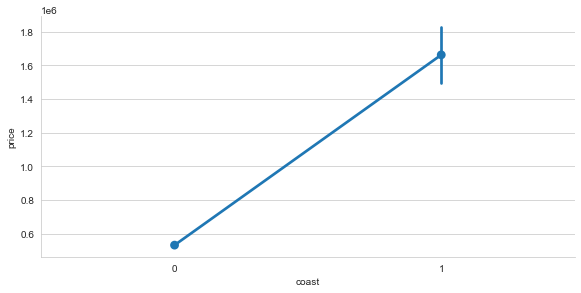

In [62]:
print(sns.factorplot(x='coast',y='price',data=hdf, size = 4, aspect = 2));
#groupby
hdf.groupby('coast')['living_measure','price'].agg(['median','mean'])

coast - mean and median of waterfront view is high however such houses are very small in compare to non-waterfront view. Also, living_measure mean and median is greater for waterfront house.
The house properties with water_front tend to have higher price compared to that of non-water_front properties.

# sight v/s Price

price                 living_measure              
               mean   median   size           mean median   size
sight                                                           
0      4.966235e+05   432500  19489    1997.761660   1850  19489
1      8.125186e+05   690944    332    2568.960843   2420    332
2      7.927462e+05   675000    963    2655.257529   2470    963
3      9.724684e+05   802500    510    3018.564706   2840    510
4      1.464363e+06  1190000    319    3351.473354   3050    319

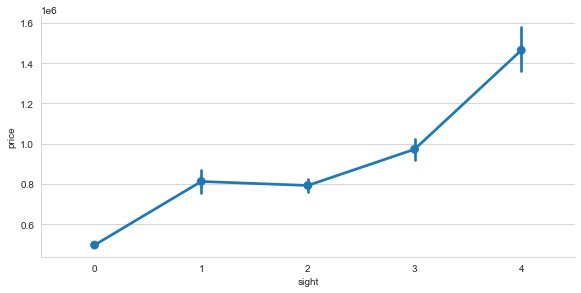

In [63]:
print(sns.factorplot(x='sight',y='price',data=hdf, size = 4, aspect = 2));
#groupby
hdf.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

sight - have outliers. The house sighted more have high price (mean and median) and have large living area as well.
Properties with higher price have more no.of sights compared to that of houses with lower price

# condition v/s Price

price                living_measure              
                    mean  median   size           mean median   size
condition                                                           
1          334431.666667  262500     30    1216.000000   1000     30
2          327316.215116  279000    172    1410.058140   1320    172
3          542097.086024  450000  14031    2149.042050   1970  14031
4          521300.705230  440000   5679    1950.991724   1820   5679
5          612577.742504  526000   1701    2022.911229   1880   1701

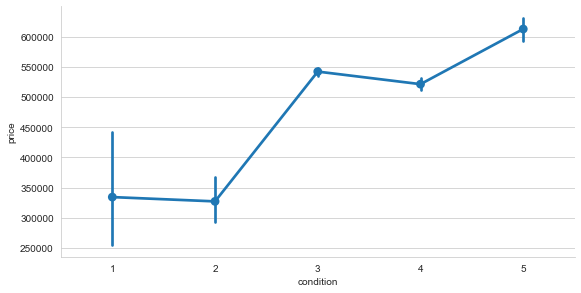

In [64]:
print(sns.factorplot(x='condition',y='price',data=hdf, size = 4, aspect = 2))
#groupby
hdf.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

condition - as the condition rating increases its price and living measure mean and median also increases.
The price of the house increases with condition rating of the house

# quality v/s Price

price                  living_measure             
                 mean     median  size           mean median  size
quality                                                           
1        1.420000e+05   142000.0     1     290.000000    290     1
3        2.056667e+05   262000.0     3     596.666667    600     3
4        2.143810e+05   205000.0    29     660.482759    660    29
5        2.485240e+05   228700.0   242     983.326446    905   242
6        3.019166e+05   275276.5  2038    1191.561335   1120  2038
7        4.025933e+05   375000.0  8981    1689.400401   1630  8981
8        5.428955e+05   510000.0  6068    2184.748517   2150  6068
9        7.737382e+05   720000.0  2615    2868.139962   2820  2615
10       1.072347e+06   914327.0  1134    3520.299824   3450  1134
11       1.497792e+06  1280000.0   399    4395.448622   4260   399
12       2.192500e+06  1820000.0    90    5471.588889   4965    90
13       3.710769e+06  2980000.0    13    7483.076923   7100    13

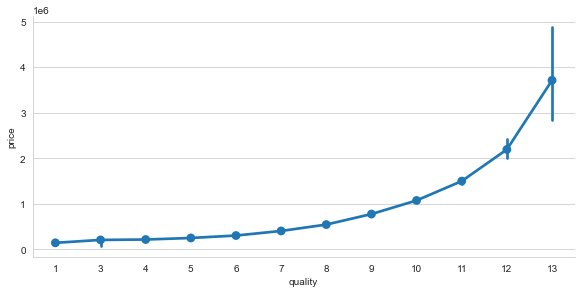

In [65]:
print(sns.factorplot(x='quality',y='price',data=hdf, size = 4, aspect = 2))
#groupby
hdf.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

quality - with grade increase price and living_measure increase (mean and median).
There is clear increase in price of the house with higher rating on quality

# ceil_measure v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

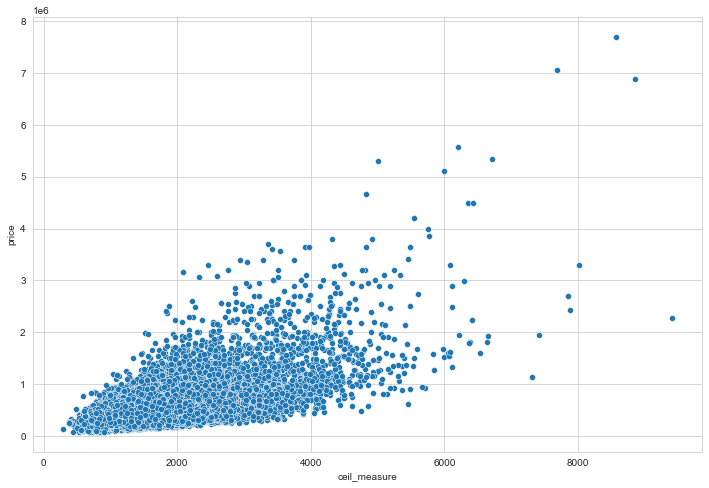

In [66]:
plt.figure(figsize=(12, 8))
print(sns.scatterplot(hdf['ceil_measure'],hdf['price']));
hdf['ceil_measure'].describe()

ceil_measure - price increases with increase in ceil measure.There is upward trend in price with ceil_measure

# basement v/s price

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: basement, dtype: float64

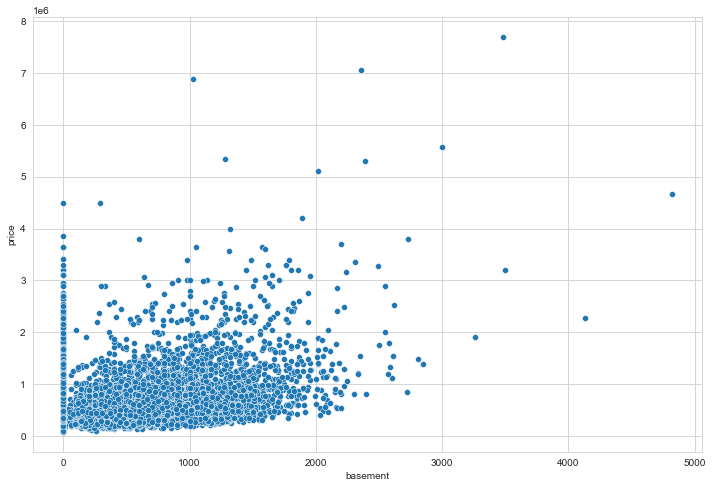

In [67]:
plt.figure(figsize=(12, 8))
print(sns.scatterplot(hdf['basement'],hdf['price']));
hdf['basement'].describe()

We will create the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.

In [68]:
#Binning Basement to analyse data
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
hdf['has_basement'] = hdf['basement'].apply(create_basement_group)

price                living_measure              
                       mean  median   size           mean median   size
has_basement                                                           
No            486945.394789  411500  13126    1928.879628   1740  13126
Yes           622518.174384  515000   8487    2313.467539   2100   8487

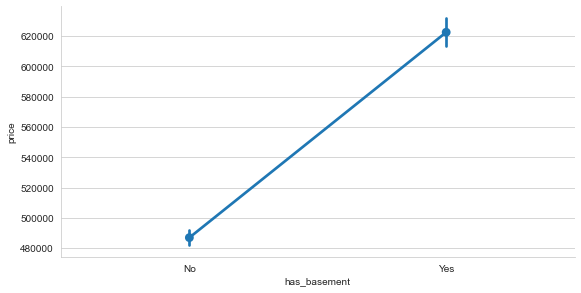

In [69]:
#basement - after binning we data shows with basement houses are costlier and have higher 
#living measure (mean & median)
print(sns.factorplot(x='has_basement',y='price',data=hdf, size = 4, aspect = 2));
hdf.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

The houses with basement has better price compared to that of houses without basement.

# yr_renovated v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


,mean,median,size
yr_renovated,,,
1934,459950.000000,459950.0,1
1940,378400.000000,378400.0,2
1944,521000.000000,521000.0,1
1945,398666.666667,375000.0,3
1946,351137.500000,351137.5,2
...,...,...,...
2011,607496.153846,577000.0,13
2012,625181.818182,515000.0,11
2013,664960.810811,560000.0,37


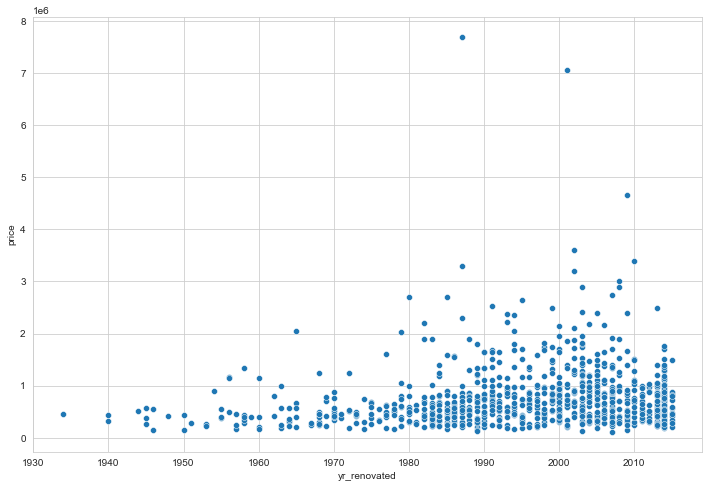

In [70]:
#yr_renovated - 
plt.figure(figsize=(12,8))
x=hdf[hdf['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

So most houses are renovated after 1980's. We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated. For further ananlysis we will use this categorical variable.

In [71]:
hdf.head(1)

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
0,3034200666,11-2014,808100,4,3.25,3020,13457,1.0,0,0,...,98133,47.7174,-122.336,2120,7553,1,16477,2014,58,No


# house_age v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


,mean,median,size
house_age,,,
11,8.250000e+05,825000,1
16,4.995000e+05,499500,1
17,9.328000e+05,932800,1
18,1.405000e+06,1405000,2
23,3.300000e+05,330000,1
...,...,...,...
111,4.222000e+05,427500,8
112,4.845000e+05,484500,2
113,1.160000e+06,1160000,1


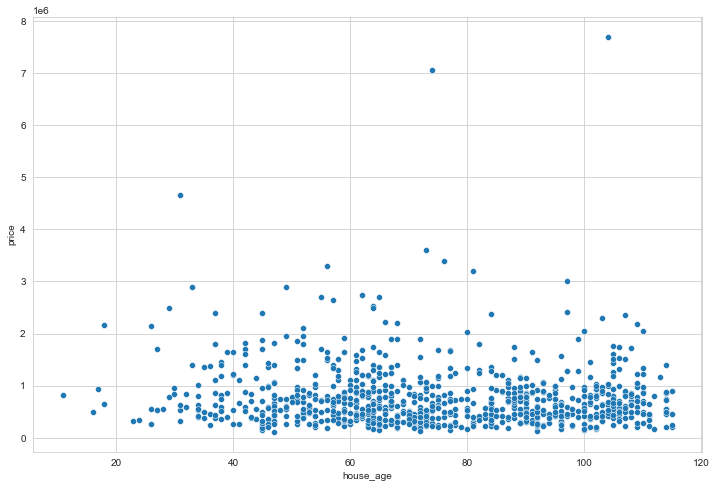

In [72]:
# We have created new feature 'Houseage'. Will analyze Houseage with respect to Price
#yr_renovated - 
plt.figure(figsize=(12,8))
# x=hdf[hdf['yr_renovated']>0]
print(sns.scatterplot(x['house_age'],x['price']))
#groupby
x.groupby('house_age')['price'].agg(['mean','median','size'])

Trend is not clear with respect to age of the house and Price. Corelatio between them is also very low.

# furnished v/s Price

AxesSubplot(0.125,0.125;0.775x0.755)


price                living_measure              
                    mean  median   size           mean median   size
furnished                                                           
0          437300.158968  401000  17362    1792.256652   1720  17362
1          960374.414961  810000   4251    3254.696072   3110   4251

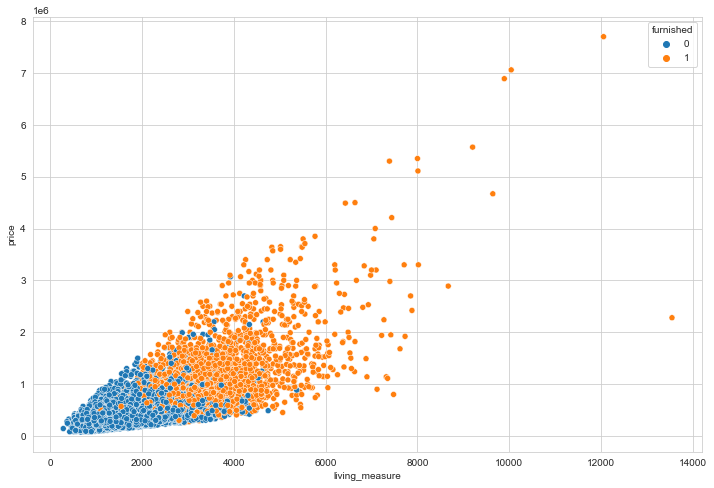

In [73]:
plt.figure(figsize=(12, 8))
print(sns.scatterplot(hdf['living_measure'],hdf['price'],hue=hdf['furnished']))
#groupby
hdf.groupby('furnished')['price','living_measure'].agg(['mean','median','size'])

furnished - Furnished has higher price value and has greater living_measure. Furnished houses have higher price than that of the Non-furnished houses

# 5. Data Pre-processing

# Outliers Handling

We have seen outliers in many of the attributes like  columns room_bat, living_measure, lot_measure, ceil_measure and Basement.

In [74]:
# Let us write a function for outliers treatment
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [75]:
hdf_with_outlier = hdf.copy()      #--->  dataframe with outliers

In [76]:
hdf_log_trans  = hdf.copy()        #----> dataframe after Log Transformation

# Treating outliers for column - ceil_measure

In [77]:
lowerbound,upperbound = outlier_treatment(hdf.ceil_measure)
print(lowerbound,upperbound)

-340.0 3740.0


Lower bound and upper bound values ranges from -34 to 3740 

In [78]:
# let us check the column
hdf[(hdf.ceil_measure < lowerbound) | (hdf.ceil_measure > upperbound)]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
33,7237500390,11-2014,1570000,5,4.50,6070,14731,2.0,0,0,...,98059,47.5306,-122.134,4750,13404,1,20801,2014,10,No
105,326069026,01-2015,900000,4,3.00,3810,217800,2.0,0,0,...,98077,47.7696,-122.021,2580,217364,1,221610,2015,12,No
121,3425069117,08-2014,1280000,6,5.25,6160,27490,2.0,0,0,...,98074,47.6094,-122.023,4225,9100,1,33650,2014,7,Yes
197,2125059013,04-2015,1670000,5,3.50,4320,40816,2.0,0,0,...,98004,47.6440,-122.185,4320,44584,1,45136,2015,18,No
232,6154500030,06-2014,1080000,4,3.50,3990,5267,2.0,0,0,...,98006,47.5641,-122.124,3230,6481,1,9257,2014,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,1560920450,09-2014,550000,4,3.00,4180,35169,2.0,0,0,...,98038,47.4000,-122.027,3010,35190,1,39349,2014,28,No
21495,853600150,05-2014,1680000,4,4.25,5584,68257,2.0,0,0,...,98014,47.6113,-121.952,5030,101901,1,73841,2014,16,No
21554,9206700060,11-2014,710000,4,2.50,4070,129808,2.0,0,0,...,98038,47.4433,-122.016,4070,102366,1,133878,2014,16,No
21566,1651500040,08-2014,1980000,4,4.00,4360,12081,2.0,0,0,...,98004,47.6377,-122.219,2180,10800,1,16441,2014,7,No


In [79]:
#dropping the outliers record from the dataset
hdf.drop(hdf[(hdf.ceil_measure > upperbound) | (hdf.ceil_measure < lowerbound) ].index, inplace=True)

All the outliers values in both upper and lower limit have been removed.

In [80]:
# Let us anlyse also by considering log transormation 
hdf_log_trans['ceil_measure_log'] = np.log10(hdf_log_trans.ceil_measure)

In [81]:
hdf_log_trans.drop(['ceil_measure'],axis=1,inplace=True)
hdf_log_trans.head(2)

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement,ceil_measure_log
0,3034200666,11-2014,808100,4,3.25,3020,13457,1.0,0,0,...,47.7174,-122.336,2120,7553,1,16477,2014,58,No,3.480007
1,8731981640,12-2014,277500,4,2.50,2550,7500,1.0,0,0,...,47.3165,-122.386,2260,8800,0,10050,2014,38,Yes,3.243038


Only 'ceil_measure_log' is considered and the original column have been dropped.

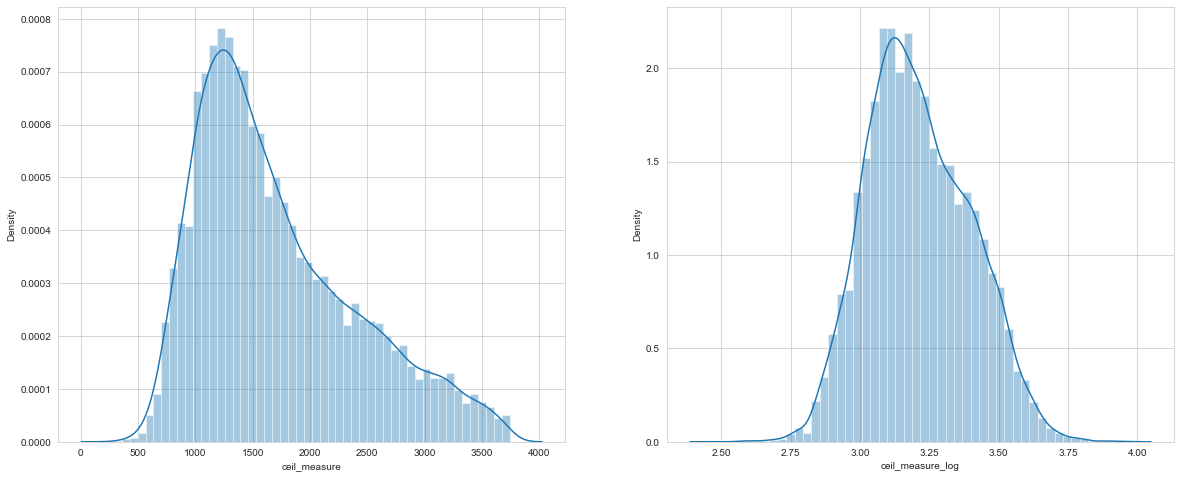

In [82]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.distplot(hdf.ceil_measure);

plt.subplot(1,2,2)
sns.distplot(hdf_log_trans.ceil_measure_log);

After log transformation distribution found almost normal.

In [83]:
#ceil_measure
print("Skewness after droping outlier is :", hdf.ceil_measure.skew())
print("Skewness after log transformation is :", hdf_log_trans.ceil_measure_log.skew())

Skewness after droping outlier is : 0.8198869256569327
Skewness after log transformation is : 0.253384126301554


# Treating outliers for column - basement

In [84]:
lowerbound_base,upperbound_base = outlier_treatment(hdf.basement)
print(lowerbound_base,upperbound_base)

-855.0 1425.0


In [85]:
hdf[(hdf.basement < lowerbound_base) | (hdf.basement > upperbound_base)]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
14,5072100095,11-2014,554000,5,2.50,3440,12900,1.0,0,2,...,98166,47.4426,-122.342,2100,10751,0,16340,2014,56,Yes
28,7855000460,10-2014,1450000,3,2.75,3940,9671,1.0,0,4,...,98006,47.5654,-122.158,3390,9360,1,13611,2014,47,Yes
46,240000058,04-2015,469000,4,2.75,3550,13938,1.0,0,0,...,98188,47.4250,-122.283,2050,9000,0,17488,2015,49,Yes
50,5154700060,10-2014,1660000,4,2.75,3520,19200,1.0,1,4,...,98136,47.5250,-122.393,2450,7000,1,22720,2014,63,Yes
51,5561400220,08-2014,592500,4,2.50,3370,35150,1.0,0,0,...,98027,47.4610,-122.002,2920,41241,0,38520,2014,21,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21401,9315600050,03-2015,1680000,5,3.25,4560,19080,1.0,0,0,...,98004,47.6291,-122.226,3390,20140,1,23640,2015,52,Yes
21486,3582900280,06-2014,1120000,5,2.75,4400,18500,1.0,0,3,...,98028,47.7424,-122.263,3290,19257,1,22900,2014,51,Yes
21494,3395000070,09-2014,1540000,4,2.75,4910,15139,1.0,0,0,...,98004,47.6444,-122.220,3980,15139,1,20049,2014,50,Yes
21501,2021201000,05-2014,980000,4,3.00,3680,5854,1.0,0,3,...,98199,47.6327,-122.395,3140,5000,1,9534,2014,47,Yes


We got 408 records as outliers, let's drop these outliers

In [86]:
#dropping the record from the dataset
hdf.drop(hdf[(hdf.basement > upperbound_base) | (hdf.basement < lowerbound_base)].index, inplace=True)

Outliers in 'basement' have been dropped for this dataframe

# Treating outliers for column - living_measure

In [87]:
lowerbound_lim,upperbound_lim = outlier_treatment(hdf.living_measure)
print(lowerbound_lim,upperbound_lim)

-160.0 4000.0


In [88]:
hdf[(hdf.living_measure < lowerbound_lim) | (hdf.living_measure > upperbound_lim)]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
372,7636800041,06-2014,995000,3,4.50,4380,47044,2.0,1,3,...,98166,47.4734,-122.365,2460,18512,1,51424,2014,46,Yes
462,3271800910,07-2014,1360000,4,3.50,4270,5800,2.0,0,3,...,98199,47.6474,-122.411,3100,5800,1,10070,2014,77,Yes
551,1024049024,12-2014,1740000,5,3.50,4870,7700,2.5,0,3,...,98144,47.5832,-122.290,3220,7700,1,12570,2014,85,Yes
567,9185700485,04-2015,2540000,4,3.50,4350,6000,2.0,0,0,...,98112,47.6277,-122.286,4190,7200,1,10350,2015,107,Yes
780,624111000,08-2014,950000,3,3.00,4040,14338,2.0,0,0,...,98077,47.7268,-122.060,3360,14142,1,18378,2014,28,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21062,3303980140,04-2015,1150000,4,3.00,4160,13170,2.0,0,0,...,98059,47.5182,-122.149,3780,13148,1,17330,2015,14,Yes
21125,5700003630,06-2014,1930000,5,4.25,4830,8050,2.5,0,2,...,98144,47.5789,-122.286,4470,9194,1,12880,2014,100,Yes
21405,1624059224,06-2014,1160000,4,3.50,4680,9700,2.0,0,0,...,98006,47.5703,-122.165,2800,12343,1,14380,2014,9,Yes
21552,3575303430,10-2014,780000,6,4.25,4310,10000,2.0,0,0,...,98074,47.6214,-122.062,2100,10000,0,14310,2014,6,Yes


In [89]:
hdf.drop(hdf[(hdf.living_measure>upperbound_lim) | (hdf.living_measure<lowerbound_lim)].index,inplace=True)

Outliers in 'living_measure' have been dropped for this dataframe.


In [90]:
# Let us consider log transformation
hdf_log_trans['living_measure_log'] = np.log10(hdf_log_trans.living_measure)
hdf_log_trans.drop(['living_measure'],axis=1,inplace=True)
hdf_log_trans.head(2)

,cid,month_year,price,room_bed,room_bath,lot_measure,ceil,coast,sight,condition,...,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement,ceil_measure_log,living_measure_log
0,3034200666,11-2014,808100,4,3.25,13457,1.0,0,0,5,...,-122.336,2120,7553,1,16477,2014,58,No,3.480007,3.480007
1,8731981640,12-2014,277500,4,2.50,7500,1.0,0,0,3,...,-122.386,2260,8800,0,10050,2014,38,Yes,3.243038,3.406540


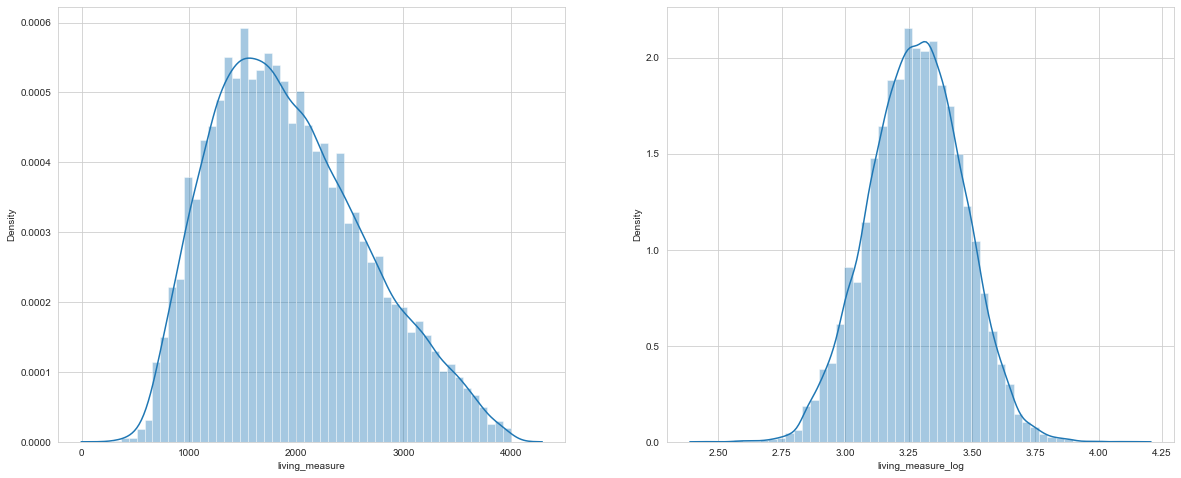

In [91]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.distplot(hdf.living_measure);

plt.subplot(1,2,2)
sns.distplot(hdf_log_trans.living_measure_log);

In [92]:
#Living measure skewness
print("Skewness after droping outlier is :", hdf.living_measure.skew())
print("Skewness after log transformation is :", hdf_log_trans.living_measure_log.skew())

Skewness after droping outlier is : 0.47196155430940123
Skewness after log transformation is : -0.0354376929956991


# Treating outliers for column - lot_measure

In [93]:
lowerbound_lom,upperbound_lom = outlier_treatment(hdf.lot_measure)
print(lowerbound_lom,upperbound_lom)

-2774.875 17958.125


In [94]:
hdf[(hdf.lot_measure < lowerbound_lom) | (hdf.lot_measure > upperbound_lom)]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
7,114101161,08-2014,480000,3,1.50,2100,67269,1.0,0,0,...,98028,47.7592,-122.230,1610,15999,0,69369,2014,65,Yes
12,2215800050,04-2015,785000,4,2.50,3440,56192,2.0,0,0,...,98053,47.6969,-122.046,3150,44431,1,59632,2015,21,No
36,224069195,06-2014,759950,3,2.50,3100,23790,2.0,0,0,...,98075,47.5882,-122.011,2250,40854,1,26890,2014,12,No
40,2524069072,06-2014,243800,3,1.00,1140,27760,1.0,0,0,...,98027,47.5372,-121.972,1690,87300,0,28900,2014,33,No
45,87000213,06-2014,129000,2,1.00,1150,30184,1.0,0,0,...,98055,47.4492,-122.200,1670,19684,0,31334,2014,64,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21547,4045500715,12-2014,598800,1,1.00,1090,32010,1.0,0,0,...,98014,47.6928,-121.870,1870,25346,0,33100,2014,56,No
21564,4045700455,03-2015,363000,3,0.75,2510,20000,2.0,0,0,...,98001,47.2871,-122.287,2130,20000,0,22510,2015,54,No
21565,5561301220,06-2014,589900,4,4.50,3870,35889,2.0,0,0,...,98027,47.4677,-122.010,3020,35366,1,39759,2014,13,Yes
21584,1626079066,08-2014,290000,2,1.00,1120,217800,1.0,0,0,...,98019,47.7378,-121.912,1480,217800,0,218920,2014,38,No


We got 2128 records which are outliers. Let's drop these outlier records.

In [95]:
#dropping the record from the dataset
hdf.drop(hdf[(hdf.lot_measure > upperbound_lom) | (hdf.lot_measure < lowerbound_lom) ].index, inplace=True)

In [96]:
# Let us consider log transformation
hdf_log_trans['lot_measure_log'] = np.log10(hdf_log_trans.lot_measure)
hdf_log_trans.drop(['lot_measure'],axis=1,inplace=True)
hdf_log_trans.head(2)

,cid,month_year,price,room_bed,room_bath,ceil,coast,sight,condition,quality,...,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement,ceil_measure_log,living_measure_log,lot_measure_log
0,3034200666,11-2014,808100,4,3.25,1.0,0,0,5,9,...,2120,7553,1,16477,2014,58,No,3.480007,3.480007,4.128948
1,8731981640,12-2014,277500,4,2.50,1.0,0,0,3,8,...,2260,8800,0,10050,2014,38,Yes,3.243038,3.406540,3.875061


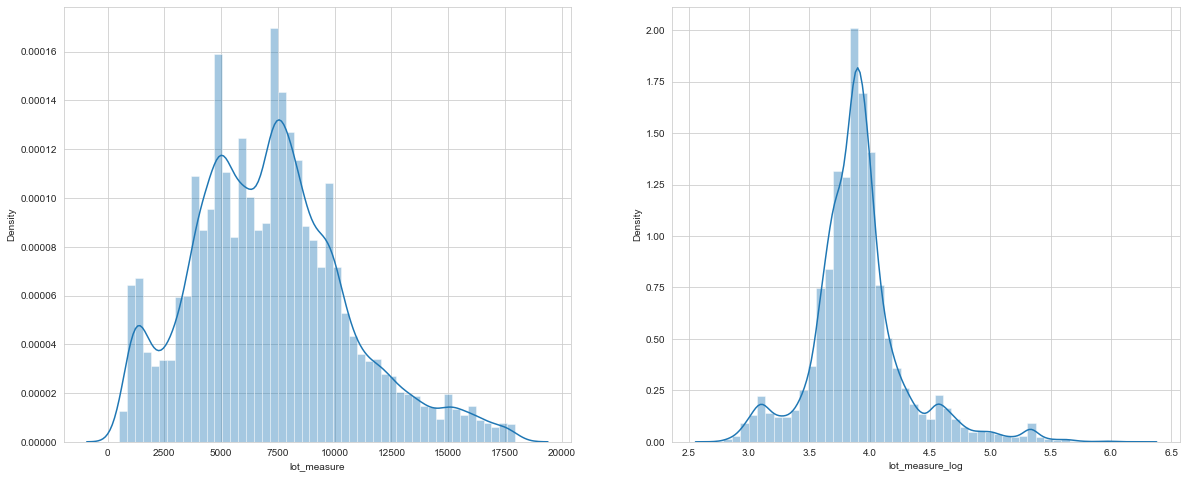

In [97]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.distplot(hdf.lot_measure);

plt.subplot(1,2,2)
sns.distplot(hdf_log_trans.lot_measure_log);

# Treating outliers for column - room_bed

In [98]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
hdf[hdf['room_bed']==33]

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
750,2402100895,06-2014,640000,33,1.75,1620,6000,1.0,0,0,...,98103,47.6878,-122.331,1330,4700,0,7620,2014,67,Yes


In [99]:
#dropping the record from the dataset
hdf.drop(hdf[ (hdf.room_bed == 33) ].index, inplace=True)

In [100]:
hdf.shape

(18287, 26)

In summary, after treating outliers, we have lost about 15% of the data. We will analyse the impact of this data loss during the model evaluation.

In [101]:
hdf.columns

Index(['cid', 'month_year', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'sold_year', 'house_age', 'has_basement'],
      dtype='object')

In [102]:
hdf_log_trans.columns

Index(['cid', 'month_year', 'price', 'room_bed', 'room_bath', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'sold_year', 'house_age', 'has_basement',
       'ceil_measure_log', 'living_measure_log', 'lot_measure_log'],
      dtype='object')

# Let's drop unwanted columns

In [103]:
#Let's create another dataframe for modeling
df_model=hdf.copy()

In [104]:
hdf.head()

,cid,month_year,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement
0,3034200666,11-2014,808100,4,3.25,3020,13457,1.0,0,0,...,98133,47.7174,-122.336,2120,7553,1,16477,2014,58,No
1,8731981640,12-2014,277500,4,2.50,2550,7500,1.0,0,0,...,98023,47.3165,-122.386,2260,8800,0,10050,2014,38,Yes
2,5104530220,04-2015,404000,3,2.50,2370,4324,2.0,0,0,...,98038,47.3515,-121.999,2370,4348,0,6694,2015,9,No
3,6145600285,05-2014,300000,2,1.00,820,3844,1.0,0,0,...,98133,47.7049,-122.349,1520,3844,0,4664,2014,98,No
4,8924100111,04-2015,699000,2,1.50,1400,4050,1.0,0,0,...,98115,47.6768,-122.269,1900,5940,0,5450,2015,61,No


In [105]:
df = hdf.drop(['cid','month_year','yr_renovated','zipcode','lat','long'],axis=1)

In [106]:
df1 = hdf_log_trans.drop(['cid','month_year','yr_renovated','zipcode','lat','long'],axis=1)

In [107]:
df0 = hdf_with_outlier.copy()

In [108]:
df0.columns

Index(['cid', 'month_year', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'sold_year', 'house_age', 'has_basement'],
      dtype='object')

In [109]:
df0 = df0.drop(['cid','month_year','yr_renovated','zipcode','lat','long'],axis=1)

# <font color ='brown'>for our reference let's rename the dataframe for our convience

# Final dataframes for modelling
1. Dataframe with dropped outliers

In [110]:
df.shape

(18287, 20)

In [111]:
# Getting dummies for columns ceil, coast, sight, condition, quality, yr_renovated, furnished
df = pd.get_dummies(df, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement'],drop_first=True)


In [112]:
df.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'living_measure15', 'lot_measure15', 'total_area',
       'sold_year', 'house_age', 'room_bed_1', 'room_bed_2', 'room_bed_3',
       'room_bed_4', 'room_bed_5', 'room_bed_6', 'room_bed_7', 'room_bed_8',
       'room_bed_9', 'room_bed_10', 'room_bed_11', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.75',
       'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1',
       'sight_1', 'sight_2', 'sight_3', 'sight_4', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'quality_4', 'quality_5',
       'quality_6', 'qual

df----> is the final dataframe for modeling without outliers

2. Dataframe with log transformation

In [113]:
df1 = pd.get_dummies(df1, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement'],drop_first=True)

In [114]:
df1.columns

Index(['price', 'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'total_area', 'sold_year', 'house_age', 'ceil_measure_log',
       'living_measure_log', 'lot_measure_log', 'room_bed_1', 'room_bed_2',
       'room_bed_3', 'room_bed_4', 'room_bed_5', 'room_bed_6', 'room_bed_7',
       'room_bed_8', 'room_bed_9', 'room_bed_10', 'room_bed_11', 'room_bed_33',
       'room_bath_0.5', 'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25',
       'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25',
       'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25',
       'room_bath_3.5', 'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25',
       'room_bath_4.5', 'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25',
       'room_bath_5.5', 'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25',
       'room_bath_6.5', 'room_bath_6.75', 'room_bath_7.5', 'room_bath_7.75',
       'room_bath_8.0', 'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0',
       'ceil

df1----> is the final dataframe for modeling with some of the features are log transformed

3. Dataframe with outliers

In [115]:
df0 = pd.get_dummies(df0, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 
                                        'has_basement'],drop_first=True)

# 6 . Model Building

In [116]:
# Seperating dependemt and independent variables and splitting training an testing for "data with outliers".
X0 = df0.drop(columns='price', axis=1)
y0 = df0['price']

X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.3, random_state=42)

In [117]:
# Seperating dependemt and independent variables and splitting training an testing for "data without outliers".
X = df.drop(columns='price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
# Seperating dependemt and independent variables and splitting training an testing for "data with log transformation".
X1 = df1.drop(columns='price', axis=1)
y1 = df1['price']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [119]:
# Scaling the independent variables
X0_scaled = X0.apply(zscore)
X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale = train_test_split(X0_scaled, y0, test_size=0.3, random_state=42)

Four different dataframes has been made for modelling.
1. Original dataframe with outliers
2. Dataframe without outliers
3. Dataframe with log transformed columns
4. Scaled dataframe

In [120]:
# Empty dataframe of model performance
ResultsDF = pd.DataFrame({'METHOD':[],'Data type':[],'Training_accuracy':[],'Testing_accuracy':[], 'r2_score':[], 'Mean_squared_error':[],
                          'Mean_absolute_error':[]})
ResultsDF

,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error


In [121]:
# Function to calculate model performance of given model and data set

def model_performance(model,method,data_type, X_train, X_test, y_train, y_test):
    """Input: Takes Machine leaning model, method used, training and test data set as input
        * model : Machine learning used
        * method : Method used of machine learning model (eg: SVM, NB, KNN, DT, RF)
        * data_type : Type of data used to train and test model (eg:original data, balanced, standardized,
                      important features only, with or without outliers)
        * X_train, X_test : Training and testing independent features
        * y_train, y_test : Training and testing target variable
       Output: Prints out model performance for given model 
       and adds difference performance measures to the result dataframe"""
    
    global ResultsDF
    model.fit(X_train, y_train)
    
    print('Method: ', str(method))
    print('--'*10)
    train_acc = model.score(X_train, y_train)
    print("Accuracy score for training data: ",train_acc)
    test_acc = model.score(X_test, y_test)
    print("Accuracy score for test data: ",test_acc)
    print()
    y_pred = model.predict(X_test)

    model_r2_score = "%.3f" %float(r2_score(y_test, y_pred))    
    model_mse = "%.3f" %float(mean_squared_error(y_test, y_pred))
    model_mae = round(mean_absolute_error(y_test, y_pred),3)

    TempResultsDF = pd.DataFrame({'METHOD':[str(method)],'Data type':[str(data_type)],'Training_accuracy':train_acc,'Testing_accuracy':test_acc, 'r2_score':model_r2_score,
                                  'Mean_squared_error':model_mse, 'Mean_absolute_error':model_mae})
    ResultsDF = pd.concat([ResultsDF, TempResultsDF], ignore_index=True)
    
    return ResultsDF

Three performance metrics is considered to evaluate the model.
1. R squared
2. Mean squared error
3. Mean absolute error

# <font color = 'red'> Linear regression

In [122]:
# Basic Linear Regression Model
lr_model = LinearRegression()

In [123]:
# Grid search cross validation
lr_param_dict = {"n_jobs": [1,-1]}

clf = GridSearchCV(lr_model, lr_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'n_jobs': 1}

In [124]:
# Apply best parameters on data with outliers
lr_model_final = LinearRegression(n_jobs=1)
model_performance(lr_model_final, 'Linear regression', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Linear regression
--------------------
Accuracy score for training data:  0.7060769805016307
Accuracy score for test data:  0.6639796698273294



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.66398,0.664,45124674351.470,132536.83


In [125]:
# Model for data without outliers
model_performance(lr_model_final, 'Linear regression', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Linear regression
--------------------
Accuracy score for training data:  0.62268595023945
Accuracy score for test data:  -3676.8455087474017



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.83
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.96


In [126]:
# Model for data with log transformation
model_performance(lr_model_final, 'Linear regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Linear regression
--------------------
Accuracy score for training data:  0.7089582363870846
Accuracy score for test data:  0.6673062091484205



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421


In [127]:
# Model for data with scaling
# model_performance(lr_model_final, 'Linear regression', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

* Linear regression model gave consistent result without overfitting or underfitting for overall data and data with log trasnformed columns
* Linear regression model overfits and performed very poor for data with outliers and for scaled data

# <font color = 'green'> Lasso regression

In [128]:
# Let us try with L1 & L2 regularisation
lasso_model = Lasso()

In [129]:
# With outliers
lasso_param_dict = {"alpha": [1,5,10,50,100],
                   "selection" : ['cyclic', 'random']}
clf = GridSearchCV(lasso_model, lasso_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 100, 'selection': 'cyclic'}

In [130]:
lasso_model_final = Lasso(alpha=100,selection='cyclic')
model_performance(lasso_model_final, 'Lasso regression', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Lasso regression
--------------------
Accuracy score for training data:  0.7019907015359923
Accuracy score for test data:  0.6791047873845231



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419


In [131]:
# Model for data without outliers
model_performance(lasso_model_final, 'Lasso regression', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Lasso regression
--------------------
Accuracy score for training data:  0.6203979760492258
Accuracy score for test data:  0.613361612258402



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518


In [132]:
# Model for data with log transformation
model_performance(lasso_model_final, 'Lasso regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Lasso regression
--------------------
Accuracy score for training data:  0.7051696339657433
Accuracy score for test data:  0.676816408997015



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517


In [133]:
model_performance(lasso_model_final, 'Lasso regression', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  Lasso regression
--------------------
Accuracy score for training data:  0.706045868911485
Accuracy score for test data:  0.6683453842674112



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337


Lasso regression is giving good results as comparable with Linear regression in terms of model accuracy for different sets of data.

# <font color = 'green'>Ridge regression

In [134]:
ridge_model = Ridge()

In [135]:
# With outliers
ridge_param_dict = {"alpha": [1,5,10,50,100]
                   }
clf = GridSearchCV(ridge_model, ridge_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'alpha': 5}

In [136]:
#with outliers
ridge_model_final = Lasso(alpha=5)
model_performance(ridge_model_final, 'Ridge regression', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Ridge regression
--------------------
Accuracy score for training data:  0.7060430753770257
Accuracy score for test data:  0.6693213538181211



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558


In [137]:
#without outliers
model_performance(ridge_model_final, 'Ridge regression', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Ridge regression
--------------------
Accuracy score for training data:  0.6225816250922793
Accuracy score for test data:  0.6167161146683782



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618


In [138]:
# Model for data with log transformation
model_performance(ridge_model_final, 'Ridge regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Ridge regression
--------------------
Accuracy score for training data:  0.7089302337355724
Accuracy score for test data:  0.6684827314623047



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [139]:
# with scaling
model_performance(ridge_model_final, 'Ridge regression', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  Ridge regression
--------------------
Accuracy score for training data:  0.7060721081797532
Accuracy score for test data:  0.6679393351613516



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


Ridge regression is considered as good model so far. Ridge regression with log transformed data is yielding good result.

# <font color = 'red'> KNN Regressor

In [140]:
# Basic KNN Regressor Model
knn_model = KNeighborsRegressor()

In [141]:
# Grid search cross validation
knn_param_dict = {"weights": ['uniform','distance'],
              "metric": ['euclidean', 'manhattan'],
              "n_neighbors": [1,3,5,15],}

clf = GridSearchCV(knn_model, knn_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [142]:
# Data with outliers
knn_model_final = KNeighborsRegressor(metric='manhattan', n_neighbors=15, weights='distance')
model_performance(knn_model_final, 'KNN Regressor', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  KNN Regressor
--------------------
Accuracy score for training data:  0.9999192307343191
Accuracy score for test data:  0.526331595465001



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [143]:
# Model for data without outliers
model_performance(knn_model_final, 'KNN Regressor', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  KNN Regressor
--------------------
Accuracy score for training data:  0.9998257944485558
Accuracy score for test data:  0.466888058585884



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [144]:
# Model for data with log transformation
model_performance(knn_model_final, 'KNN Regressor', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  KNN Regressor
--------------------
Accuracy score for training data:  0.9999192307343191
Accuracy score for test data:  0.41019167457168515



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [145]:
# Model for data with scaling
model_performance(knn_model_final, 'KNN Regressor', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  KNN Regressor
--------------------
Accuracy score for training data:  0.9999192307343191
Accuracy score for test data:  0.6201179942724948



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


* KNN regressor overfits for all the dataframes
* Best model with KNN regressor is achieved for scaled data

## <font color = 'red'> SVM Regressor

In [146]:
# Basic SVR model
svr_model = SVR()

In [147]:
# Grid search cross validation

svr_param_dict = {"C": [0.1, 1, 10],
              "gamma": [0.001, 0.01, 0.1],}

clf = GridSearchCV(svr_model, svr_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 10, 'gamma': 0.001}

In [148]:
# Data with outliers
svr_model_final = SVR(C=10, gamma=0.001)
model_performance(svr_model_final, 'SVR', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  SVR
--------------------
Accuracy score for training data:  -0.06003636250169819
Accuracy score for test data:  -0.060735228969050814



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [149]:
# Model for data without outliers
model_performance(svr_model_final, 'SVR', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  SVR
--------------------
Accuracy score for training data:  -0.04815102322849718
Accuracy score for test data:  -0.052142976190769685



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [150]:
# Model for data with log transformation
model_performance(svr_model_final, 'SVR', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  SVR
--------------------
Accuracy score for training data:  -0.0600360900204
Accuracy score for test data:  -0.06073494826251613



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [151]:
# Model for data with scaling
model_performance(svr_model_final, 'SVR', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  SVR
--------------------
Accuracy score for training data:  -0.05692497531549412
Accuracy score for test data:  -0.057498105512244546



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


Support vector machine regressor is fitting worse than horizontal line for all the dataframes. Hence SVM model is not suitable for the present data.

## <font color = 'red'> Decison tree

In [152]:
dtr_model = DecisionTreeRegressor()

In [153]:
# Grid search cross validation
dtr_param_dict = {"max_depth": [3, 5,7],
              "max_features": [2,4,6],
              "min_samples_leaf": [3,5],
              "criterion": ["mse", "mae"]}

clf = GridSearchCV(dtr_model, dtr_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'criterion': 'mse', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 3}

In [154]:
dtr_model_final = DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=6, min_samples_leaf=3)
model_performance(dtr_model_final, 'Decision tree', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Decision tree
--------------------
Accuracy score for training data:  0.5799460749179488
Accuracy score for test data:  0.5415727131570112



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [155]:
# Model for data without outliers
model_performance(dtr_model_final, 'Decision tree', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Decision tree
--------------------
Accuracy score for training data:  0.43494467705224915
Accuracy score for test data:  0.3822449444636883



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [156]:
# Model for data with log transformation
model_performance(dtr_model_final, 'Decision tree', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Decision tree
--------------------
Accuracy score for training data:  0.5539827492901468
Accuracy score for test data:  0.4806506687179456



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [157]:
# Model for data with scaling
model_performance(dtr_model_final, 'Decision tree', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  Decision tree
--------------------
Accuracy score for training data:  0.5948554877068841
Accuracy score for test data:  0.5489275757697052



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


* Decision tree regressor worked consistently with all dataframes without any overfitting or underfitting.
* Decision tree gave better result for overall data and bad result for scaled data.

## <font color = 'red'> Random forest

In [158]:
rfr_model = RandomForestRegressor()

In [159]:
# Grid search cross validation
rfr_param_dict = {"max_features": [2,4],
              "min_samples_leaf": [3,5],
              "n_estimators":[100,300],
              "criterion": ["mse", "mae"]}

clf = GridSearchCV(rfr_model, rfr_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'criterion': 'mse',
 'max_features': 4,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [160]:
rfr_model_final = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=6, min_samples_leaf=3)
model_performance(rfr_model_final, 'Random Forest', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Random Forest
--------------------
Accuracy score for training data:  0.8129264943299519
Accuracy score for test data:  0.718101632794398



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [161]:
# Model for data without outliers
model_performance(rfr_model_final, 'Random Forest', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Random Forest
--------------------
Accuracy score for training data:  0.7894207165521159
Accuracy score for test data:  0.6371745350586873



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [162]:
# Model for data with log transformation
model_performance(rfr_model_final, 'Random Forest', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Random Forest
--------------------
Accuracy score for training data:  0.8107180897505821
Accuracy score for test data:  0.7169554327986439



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [163]:
# Model for data with scaling
model_performance(rfr_model_final, 'Random Forest', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  Random Forest
--------------------
Accuracy score for training data:  0.814283978337545
Accuracy score for test data:  0.7205038836265719



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


* Random forest regressor gave better and consistant result without overfitting or underfitting.
* Model performance is better for overall data without dropping out outliers.

* Out of all the algorithms, Linear regression for overall original data gave a better performance hance taht can be considered to be a better and final model.

# <font color = 'green'> Gradient Boost

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gbr_model = GradientBoostingRegressor()

In [166]:
# Grid search cross validation
gbr_param_dict = {"max_depth": [3, 5],
              "max_features": [2,4],
              "n_estimators":[100,200]}
              

clf = GridSearchCV(gbr_model, gbr_param_dict, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train0, y_train0)

clf.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 5, 'max_features': 4, 'n_estimators': 200}

In [167]:
#with outliers
gbr_model_final = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
model_performance(gbr_model_final, 'Gradient Boost', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Gradient Boost
--------------------
Accuracy score for training data:  0.8191147659823541
Accuracy score for test data:  0.7577316907067748



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [168]:
# Model for data without outliers
model_performance(gbr_model_final, 'Gradient Boost', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Gradient Boost
--------------------
Accuracy score for training data:  0.7316346257004744
Accuracy score for test data:  0.6703339917378464



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [169]:
# Model for data with log transformation
model_performance(gbr_model_final, 'Gradient Boost', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Gradient Boost
--------------------
Accuracy score for training data:  0.8191147659823541
Accuracy score for test data:  0.7569964882791427



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


In [170]:
# Model for data with scaling
model_performance(gbr_model_final, 'Gradient Boost', 'Scaled', X0_train_scale, X0_test_scale, y0_train_scale, y0_test_scale)

Method:  Gradient Boost
--------------------
Accuracy score for training data:  0.8191147659823541
Accuracy score for test data:  0.7584078266855058



,METHOD,Data type,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Linear regression,With outliers,0.706077,0.663980,0.664,45124674351.470,132536.830
1,Linear regression,Without outliers,0.622686,-3676.845509,-3676.846,257742418262298.562,466444.960
2,Linear regression,With log transformation,0.708958,0.667306,0.667,44677948394.429,131227.421
3,Lasso regression,With outliers,0.701991,0.679105,0.679,43093499618.842,132301.419
4,Lasso regression,Without outliers,0.620398,0.613362,0.613,27095513613.212,114264.518
5,Lasso regression,With log transformation,0.705170,0.676816,0.677,43400809386.308,130860.517
6,Lasso regression,Scaled,0.706046,0.668345,0.668,44538396008.374,132242.337
7,Ridge regression,With outliers,0.706043,0.669321,0.669,44407331592.926,132186.558
8,Ridge regression,Without outliers,0.622582,0.616716,0.617,26860430991.836,113942.618
9,Ridge regression,With log transformation,0.708930,0.668483,0.668,44519951447.477,131132.348


Gradient Boost Regressor algorithm is giving a consistent and better result comapred to all other models. Hence, here after Gradient Boost Regressor with log transformation data will be considered for further analysis.

# <font color = 'Tomato'> Considering Gradient Boost

In [171]:
gbr=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
gbr.fit(X_train1, y_train1)
y_pred= gbr.predict(X_test1)

In [172]:
gbr_r2_score = "%.3f" %float(r2_score(y_test1, y_pred))    
gbr_mse = "%.3f" %float(mean_squared_error(y_test1, y_pred))
gbr_mae = round(mean_absolute_error(y_test1, y_pred),3)
train_acc = gbr.score(X_train1, y_train1)
test_acc = gbr.score(X_test1, y_test1)

In [173]:
gbr_result_df = pd.DataFrame({'METHOD':['Gradient Boost Regressor'],'Training_accuracy':[train_acc],'Testing_accuracy':[test_acc], 'r2_score':[gbr_r2_score],
                                   'Mean_squared_error':[gbr_mse], 'Mean_absolute_error':[gbr_mae]})
gbr_result_df

,METHOD,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Gradient Boost Regressor,0.819115,0.758302,0.758,32457927627.764,118451.223


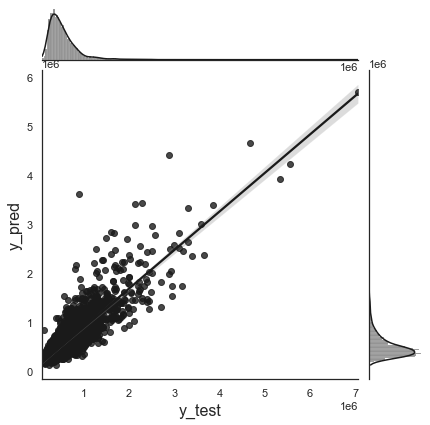

In [174]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    fig = sns.jointplot(x=y_test1, y=y_pred, kind="reg", color="k")
    fig.set_axis_labels('y_test', 'y_pred', fontsize=16)

First 20 feature importance:	 Imp    98.047
dtype: float64
First 30 feature importance:	 Imp    99.451
dtype: float64


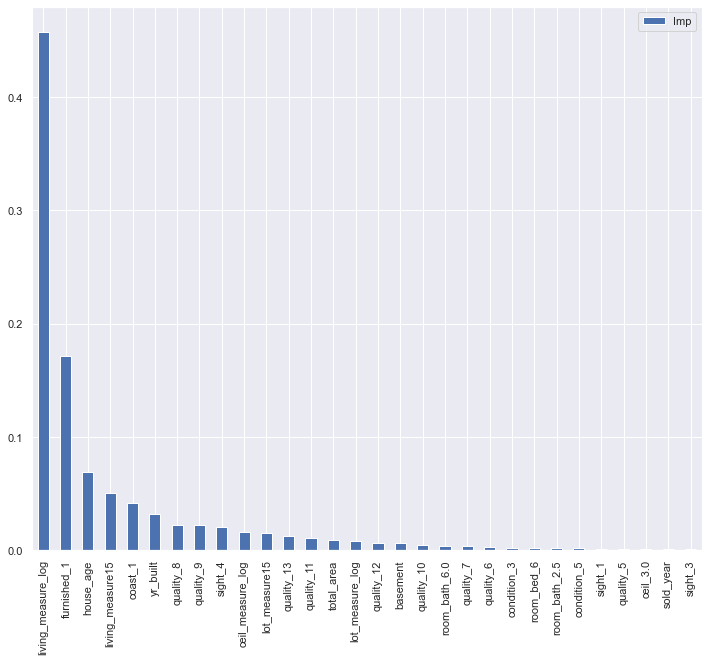

In [175]:
#feature importance
gbr_imp_feature_1= pd.DataFrame(gbr.feature_importances_, columns = ["Imp"], index = X1.columns)
gbr_imp_feature_1.sort_values(by="Imp",ascending=False)
gbr_imp_feature_1['Imp'] = gbr_imp_feature_1['Imp'].map('{0:.5f}'.format)
gbr_imp_feature_1=gbr_imp_feature_1.sort_values(by="Imp",ascending=False)
gbr_imp_feature_1.Imp=gbr_imp_feature_1.Imp.astype("float")

gbr_imp_feature_1[:30].plot.bar(figsize=(12, 10))

print("First 20 feature importance:\t",(gbr_imp_feature_1[:20].sum())*100)
print("First 30 feature importance:\t",(gbr_imp_feature_1[:30].sum())*100)

First 20 features have an importance of 98.037 and first 30 have importance of 99.445

In [176]:
gbr_imp_feature_1[:30]

,Imp
living_measure_log,0.45714
furnished_1,0.17110
house_age,0.06886
living_measure15,0.05019
coast_1,0.04156
yr_built,0.03166
quality_8,0.02237
quality_9,0.02212
sight_4,0.02036
ceil_measure_log,0.01639


# <font color = 'orrange'> Pickling Model

In [177]:
# Pickling Gradient Boost Regressor model:
import pickle
GBR = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
GBR = GBR.fit(X_train1, y_train1)
y_pred = GBR.predict(X_test1)
with open('GB_pickle','wb') as f:
    pickle.dump(GBR,f)

Gradient Boost model is stored in drive for future use.

In [178]:
# Just checking the pickled model 
with open('GB_pickle','rb') as f:
    mp=pickle.load(f)
mp.predict(X_test1)

GBR_r2_score = "%.3f" %float(r2_score(y_test1, y_pred))    
GBR_mse = "%.3f" %float(mean_squared_error(y_test1, y_pred))
GBR_mae = round(mean_absolute_error(y_test1, y_pred),3)
train_acc = GBR.score(X_train1, y_train1)
test_acc = GBR.score(X_test1, y_test1)

print(f'''Model Train accuracy : {train_acc}''')
print(f'''Model Test accuracy : {test_acc}''')
print(f'''Model r2_score : {GBR_r2_score}''')
print(f'''Model MSE : {GBR_mse}''')
print(f'''Model MAE : {GBR_mae}''')

Model Train accuracy : 0.8191147659823541
Model Test accuracy : 0.7567942353842043
Model r2_score : 0.757
Model MSE : 32660467070.694
Model MAE : 118519.586


In [179]:
X1.columns

Index(['basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'total_area', 'sold_year', 'house_age', 'ceil_measure_log',
       'living_measure_log', 'lot_measure_log', 'room_bed_1', 'room_bed_2',
       'room_bed_3', 'room_bed_4', 'room_bed_5', 'room_bed_6', 'room_bed_7',
       'room_bed_8', 'room_bed_9', 'room_bed_10', 'room_bed_11', 'room_bed_33',
       'room_bath_0.5', 'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25',
       'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25',
       'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25',
       'room_bath_3.5', 'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25',
       'room_bath_4.5', 'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25',
       'room_bath_5.5', 'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25',
       'room_bath_6.5', 'room_bath_6.75', 'room_bath_7.5', 'room_bath_7.75',
       'room_bath_8.0', 'ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0',
       'ceil_3.5', 'c

In [180]:
len(X1.columns)

78

In [181]:
df1.head()

,price,basement,yr_built,living_measure15,lot_measure15,total_area,sold_year,house_age,ceil_measure_log,living_measure_log,...,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,quality_13,furnished_1,has_basement_Yes
0,808100,0,1956,2120,7553,16477,2014,58,3.480007,3.480007,...,0,0,0,1,0,0,0,0,1,0
1,277500,800,1976,2260,8800,10050,2014,38,3.243038,3.406540,...,0,0,1,0,0,0,0,0,0,1
2,404000,0,2006,2370,4348,6694,2015,9,3.374748,3.374748,...,0,0,1,0,0,0,0,0,0,0
3,300000,0,1916,1520,3844,4664,2014,98,2.913814,2.913814,...,1,0,0,0,0,0,0,0,0,0
4,699000,0,1954,1900,5940,5450,2015,61,3.146128,3.146128,...,0,0,1,0,0,0,0,0,0,0


In [182]:
hdf_log_trans.head()

,cid,month_year,price,room_bed,room_bath,ceil,coast,sight,condition,quality,...,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement,ceil_measure_log,living_measure_log,lot_measure_log
0,3034200666,11-2014,808100,4,3.25,1.0,0,0,5,9,...,2120,7553,1,16477,2014,58,No,3.480007,3.480007,4.128948
1,8731981640,12-2014,277500,4,2.50,1.0,0,0,3,8,...,2260,8800,0,10050,2014,38,Yes,3.243038,3.406540,3.875061
2,5104530220,04-2015,404000,3,2.50,2.0,0,0,3,8,...,2370,4348,0,6694,2015,9,No,3.374748,3.374748,3.635886
3,6145600285,05-2014,300000,2,1.00,1.0,0,0,4,6,...,1520,3844,0,4664,2014,98,No,2.913814,2.913814,3.584783
4,8924100111,04-2015,699000,2,1.50,1.0,0,0,4,8,...,1900,5940,0,5450,2015,61,No,3.146128,3.146128,3.607455


In [183]:
df1_final = hdf_log_trans.drop(['cid','month_year','yr_renovated','zipcode','lat','long'],axis=1)
df1_final.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,basement,yr_built,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,has_basement,ceil_measure_log,living_measure_log,lot_measure_log
0,808100,4,3.25,1.0,0,0,5,9,0,1956,2120,7553,1,16477,2014,58,No,3.480007,3.480007,4.128948
1,277500,4,2.50,1.0,0,0,3,8,800,1976,2260,8800,0,10050,2014,38,Yes,3.243038,3.406540,3.875061
2,404000,3,2.50,2.0,0,0,3,8,0,2006,2370,4348,0,6694,2015,9,No,3.374748,3.374748,3.635886
3,300000,2,1.00,1.0,0,0,4,6,0,1916,1520,3844,0,4664,2014,98,No,2.913814,2.913814,3.584783
4,699000,2,1.50,1.0,0,0,4,8,0,1954,1900,5940,0,5450,2015,61,No,3.146128,3.146128,3.607455


In [184]:
df1_final = pd.get_dummies(df1_final, columns=['has_basement'],drop_first=True)

In [185]:
df1_final.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'sold_year', 'house_age', 'ceil_measure_log',
       'living_measure_log', 'lot_measure_log', 'has_basement_Yes'],
      dtype='object')

In [186]:
df1_final.shape

(21613, 20)

since there are only 20 attributes. Let us build our GBR model for this data. 

In [187]:
# Seperating dependemt and independent variables and splitting training an testing for "data with log transformation".
X1_new = df1_final.drop(columns='price', axis=1)
y1_new = df1_final['price']

X_train1_new, X_test1_new, y_train1_new, y_test1_new = train_test_split(X1_new, y1_new, test_size=0.3, random_state=42)

Since, It is learnt that the best model is Gradient Boost for our regression problem. Also, the hyperparameter tuning is done by Gridsearch.The best model with best hyperparameter and the best data is found from our analysis. And the same is considered for model building without one hot encoding.

In [188]:
gbr_new=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
gbr_new.fit(X_train1_new, y_train1_new)
y_pred_new= gbr_new.predict(X_test1_new)

In [189]:
gbr_r2_score_new = "%.3f" %float(r2_score(y_test1_new, y_pred_new))    
gbr_mse_new = "%.3f" %float(mean_squared_error(y_test1_new, y_pred_new))
gbr_mae_new = round(mean_absolute_error(y_test1_new, y_pred_new),3)
train_acc =gbr_new.score(X_train1_new, y_train1_new)
test_acc = gbr_new.score(X_test1_new, y_test1_new)

In [190]:
gbr_result_df_new = pd.DataFrame({'METHOD':['Gradient Boost Regressor_new'],'Training_accuracy':[train_acc],'Testing_accuracy':[test_acc], 'r2_score':[gbr_r2_score_new],
                                   'Mean_squared_error':[gbr_mse_new], 'Mean_absolute_error':[gbr_mae_new]})

gbr_result_df_new1 = pd.concat([gbr_result_df,gbr_result_df_new],ignore_index=True)
gbr_result_df_new1

,METHOD,Training_accuracy,Testing_accuracy,r2_score,Mean_squared_error,Mean_absolute_error
0,Gradient Boost Regressor,0.819115,0.758302,0.758,32457927627.764,118451.223
1,Gradient Boost Regressor_new,0.822317,0.749045,0.749,33701145200.970,118890.883


First 10 feature importance:	 Imp    95.974
dtype: float64
First 15 feature importance:	 Imp    99.65
dtype: float64


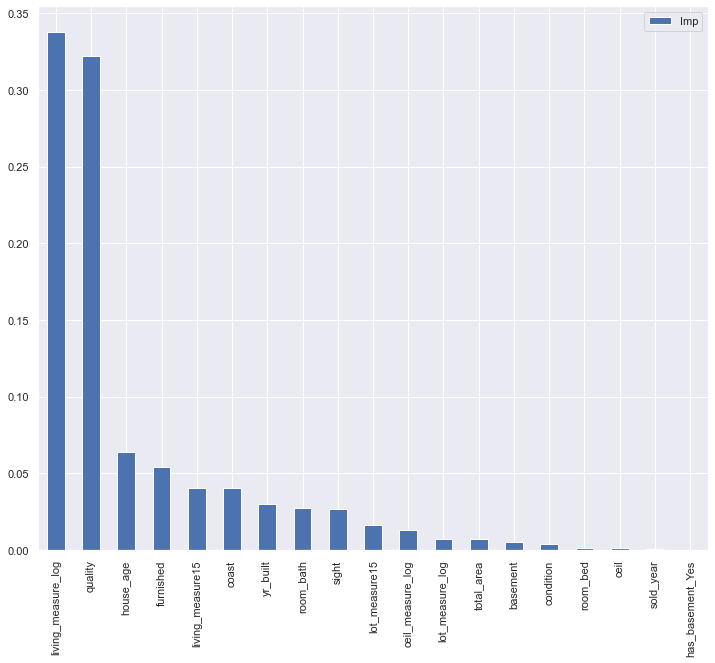

In [191]:
#feature importance
gbr_imp_feature_1= pd.DataFrame(gbr_new.feature_importances_, columns = ["Imp"], index = X_train1_new.columns)
gbr_imp_feature_1.sort_values(by="Imp",ascending=False)
gbr_imp_feature_1['Imp'] = gbr_imp_feature_1['Imp'].map('{0:.5f}'.format)
gbr_imp_feature_1=gbr_imp_feature_1.sort_values(by="Imp",ascending=False)
gbr_imp_feature_1.Imp=gbr_imp_feature_1.Imp.astype("float")

gbr_imp_feature_1[:30].plot.bar(figsize=(12, 10))

print("First 10 feature importance:\t",(gbr_imp_feature_1[:10].sum())*100)
print("First 15 feature importance:\t",(gbr_imp_feature_1[:15].sum())*100)

In [192]:
gbr_imp_feature_1[:]

,Imp
living_measure_log,0.33758
quality,0.32200
house_age,0.06375
furnished,0.05441
living_measure15,0.04077
coast,0.04020
yr_built,0.03027
room_bath,0.02723
sight,0.02692
lot_measure15,0.01661


# <font color = 'green'> Pickling The final model:

In [193]:
# Pickling The final Gradient Boost Regressor model without considering one hot encoding:
import pickle
gbr_new=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1)
gbr_new.fit(X_train1_new, y_train1_new)
y_pred_new= gbr_new.predict(X_test1_new)
with open('GBR_new_pickle','wb') as f:
    pickle.dump(gbr_new,f)

In [194]:
# Just checking the pickled model 
with open('GBR_new_pickle','rb') as f:
    mp=pickle.load(f)
mp.predict(X_test1_new)

gbr_r2_score_new = "%.3f" %float(r2_score(y_test1_new, y_pred_new))    
gbr_mse_new = "%.3f" %float(mean_squared_error(y_test1_new, y_pred_new))
gbr_mae_new = round(mean_absolute_error(y_test1_new, y_pred_new),3)
train_acc =gbr_new.score(X_train1_new, y_train1_new)
test_acc = gbr_new.score(X_test1_new, y_test1_new)

print(f'''Model Train accuracy : {train_acc}''')
print(f'''Model Test accuracy : {test_acc}''')
print(f'''Model r2_score : {gbr_r2_score_new}''')
print(f'''Model MSE : {gbr_mse_new}''')
print(f'''Model MAE : {gbr_mae_new}''')

Model Train accuracy : 0.822317085271464
Model Test accuracy : 0.7487681106434356
Model r2_score : 0.749
Model MSE : 33738307405.668
Model MAE : 118862.806


Best model is pickled and crosschecked also

In [195]:
import json
columns = {'data.columns':[col.lower() for col in X_train1_new.columns ]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [196]:
df1_final.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,basement,yr_built,living_measure15,lot_measure15,furnished,total_area,sold_year,house_age,ceil_measure_log,living_measure_log,lot_measure_log,has_basement_Yes
0,808100,4,3.25,1.0,0,0,5,9,0,1956,2120,7553,1,16477,2014,58,3.480007,3.480007,4.128948,0
1,277500,4,2.50,1.0,0,0,3,8,800,1976,2260,8800,0,10050,2014,38,3.243038,3.406540,3.875061,1
2,404000,3,2.50,2.0,0,0,3,8,0,2006,2370,4348,0,6694,2015,9,3.374748,3.374748,3.635886,0
3,300000,2,1.00,1.0,0,0,4,6,0,1916,1520,3844,0,4664,2014,98,2.913814,2.913814,3.584783,0
4,699000,2,1.50,1.0,0,0,4,8,0,1954,1900,5940,0,5450,2015,61,3.146128,3.146128,3.607455,0


In [197]:
act1 = df1_final.iloc[0][0]
act2 = df1_final.iloc[3][0]
act3 = df1_final.iloc[4][0]
print(act3)

699000.0


# <font color = 'Tomato'>Checking the price of house by inputing different values for independent attributes.

In [198]:
def predict_price(room_bed, room_bath, ceil, coast, sight, condition,
       quality, basement, yr_built, living_measure15, lot_measure15,
       furnished, total_area, sold_year, house_age, ceil_measure_log,
       living_measure_log, lot_measure_log, has_basement_Yes):
    
    x = np.zeros(len(X_train1_new.columns))
    x[0] = room_bed
    x[1] = room_bath
    x[2] = ceil
    x[3] = coast
    x[4] = sight
    x[5] = condition
    x[6] = quality
    x[7] = basement
    x[8] = yr_built
    x[9] = living_measure15
    x[10] = lot_measure15
    x[11] = furnished
    x[12] = total_area
    x[13] = sold_year
    x[14] = house_age
    x[15] = ceil_measure_log
    x[16] = living_measure_log
    x[17] = lot_measure_log
    x[18] = has_basement_Yes
    
    return gbr_new.predict([x])[0]

In [199]:
# cross checking the values
# first row
pre1 = predict_price(4,3.25,1,0,0,5,9,0,1956,2120,7553,1,16477,2014,58,3.480007,3.480007,4.128948,0)
print(f'''The Predicted price of the house for the given attributes from our model is: {pre1}''')

The Predicted price of the house for the given attributes from our model is: 1027601.2914111025


#                                                     <font color = 'red'>OR

In [200]:
model = pickle.load(open('GBR_new_pickle','rb'))
data ={'room_bed':4,'room_bath':3.25,'ceil':1,'coast':0,'sight':0,'condition':5,'quality':9,'basement':0,'yr_built':1956,'living_measure15':2120,'lot_measure15':7553,'furnished':1,'total_area':16477,'sold_year':2014,'house_age':58,'ceil_measure_log':3.480007,'living_measure_log':3.480007,'lot_measure_log':4.128948,'has_basement_Yes':0}

predict_request =[[data['room_bed'],data['room_bath'],data['ceil'],data['coast'],data['sight'],data['condition'],data['quality'],data['basement'],data['yr_built'],data['living_measure15'],data['lot_measure15'],data['furnished'],data['total_area'],data['sold_year'],data['house_age'],data['ceil_measure_log'],data['living_measure_log'],data['lot_measure_log'],data['has_basement_Yes']]]
predict_request = np.array(predict_request)
# print(predict_request)
prediction = model.predict(predict_request)
output = prediction[0]
print(f'''The Predicted price of the house for the given attributes from our model is: {output}''')

The Predicted price of the house for the given attributes from our model is: 1027601.2914111025


In [201]:
# Fourth row
pre2 = predict_price(2,1,1,0,0,4,6,0,1916,1520,3844,0,4664,2014,98,2.913814,2.913814,3.584783,0)
print(f'''The Predicted price of the house for the given attributes from our model is: {pre2}''')

The Predicted price of the house for the given attributes from our model is: 373963.3683395059


In [202]:
# Fifth row
pre3 = predict_price(2,1.50,1,0,0,4,8,0,1954,1900,5940,0,5450,2015,61,3.146128,3.146128,3.607455,0)
print(f'''The Predicted price of the house for the given attributes from our model is: {pre3}''')

The Predicted price of the house for the given attributes from our model is: 580420.9993889052


In [203]:
# Actual v/s predicted price comparision random checking
print(round(pre1))
Price_comparision = pd.DataFrame({'Records':['1st record','4th record','5th record'],'Actual Price':[act1,act2,act3],'Predicted Price':[pre1,pre2,pre3]})
Price_comparision

1027601


,Records,Actual Price,Predicted Price
0,1st record,808100.0,1.027601e+06
1,4th record,300000.0,3.739634e+05
2,5th record,699000.0,5.804210e+05
